In [1]:
import functions as fn
import pandas as pd
from importlib import reload
from tqdm import tqdm
from termcolor import colored
import matplotlib.pyplot as plt
from ooipy.tools import ooiplotlib as ooiplt
import ooipy
import numpy as np
import datetime

In [2]:
df = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/ais_2014B_2020B_V2.csv',sep = ',')

df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')

In [3]:
df.shape

(2003830, 30)

In [4]:
def get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration):
    reload(fn)
    if hydrophone_idx==1:
        hydro='Axial_Base'
    elif hydrophone_idx==2:
        hydro='Central_Caldera'
    elif hydrophone_idx==3:
        hydro='Eastern_Caldera'
    suffix=str(inner_rad)+'_'+ str(outer_rad)+'.csv'
    ais=fn.choose_df(df,hydrophone_idx)
    isolated_ships=fn.get_isolated_ships(ais,inner_rad,outer_rad,min_duration)
    isolated_ais=fn.isolated_ais(ais,isolated_ships,inner_rad)
    
    return isolated_ships,isolated_ais

In [5]:
hydrophone_idx=1
min_duration=10
inner_rad=10
outer_rad=30
isolated_ships, isolated_ais=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)

 Max distance: 166.51 and Min distance: 0.01


100%|████████████████████████████████████████████████████████████████████████████████| 389/389 [00:08<00:00, 45.61it/s]


In [6]:
isolated_ships.head()

,MMSI,start_time,end_time,count,VESSEL TYPE,len_of_recording
0,210059000,2016-11-25 22:31:26,2016-11-25 23:12:26,5,Bulk Carrier,41.000000
1,210233000,2018-11-13 06:49:29,2018-11-13 07:25:19,13,Bulk Carrier,35.833333
2,211578000,2018-12-11 07:08:40,2018-12-11 07:47:59,4,Container Ship,39.316667
3,212049000,2017-07-04 17:20:20,2017-07-04 22:43:32,8,Bulk Carrier,323.200000
4,212237000,2018-02-19 16:10:38,2018-02-19 16:41:59,3,Bulk Carrier,31.350000


In [111]:
isolated_ships[isolated_ships['VESSEL TYPE']=='Inland, Unknown']

,MMSI,start_time,end_time,count,VESSEL TYPE,len_of_recording
300,518107000,2017-08-13 16:38:19,2017-08-13 16:58:39,2,"Inland, Unknown",20.333333


In [14]:
iso_vessel_list=list(isolated_ships['VESSEL TYPE'].unique())

In [16]:
len(iso_vessel_list)

29

In [51]:
iso_vessel_list

['Bulk Carrier',
 'Container Ship',
 'General Cargo',
 'Oil Products Tanker',
 'Tug/Supply Vessel',
 'Passenger Ship',
 'Oil/Chemical Tanker',
 'Crude Oil Tanker',
 'Tug',
 'Towing Vessel',
 'Unspecified',
 'Reefer',
 'Cargo',
 'Tanker',
 'Offshore Supply Ship',
 'Special Vessel',
 'Vehicles Carrier',
 'Wood Chips Carrier',
 'Ro-Ro Cargo',
 'Passenger',
 'Research/Survey Vessel',
 'Icebreaker',
 'Fishing Vessel',
 'Heavy Load Carrier',
 'Cargo/Containership',
 'Inland, Unknown',
 'Chemical Tanker',
 'LPG Tanker',
 'Yacht']

Since there are NaN in the list,lets remove them first

In [50]:
iso_vessel_list.remove(np.NaN)

ValueError: list.remove(x): x not in list

In [61]:
n=5
start_time=isolated_ships['start_time'].iloc[n]
end_time=isolated_ships['end_time'].iloc[n]
vessel_name=isolated_ships['VESSEL TYPE'].iloc[n]
print(start_time,end_time)

2016-04-01 18:49:28 2016-04-01 19:32:59


In [50]:
start= start_time - datetime.timedelta(minutes = 5)
end= end_time + datetime.timedelta(minutes = 5)
print(start,end)

2015-07-27 18:43:11 2015-07-28 03:38:31


In [51]:
node='Axial_Base'
data_trace = ooipy.get_acoustic_data_LF(start, end, node, verbose=True, zero_mean=True)

In [52]:
print(data_trace.stats)

         network: OO
         station: AXBA1
        location: AXBA1
         channel: HDH
       starttime: 2015-07-27T18:43:11.000000Z
         endtime: 2015-07-27T21:26:34.020000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 1960605
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1942, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 26038272})


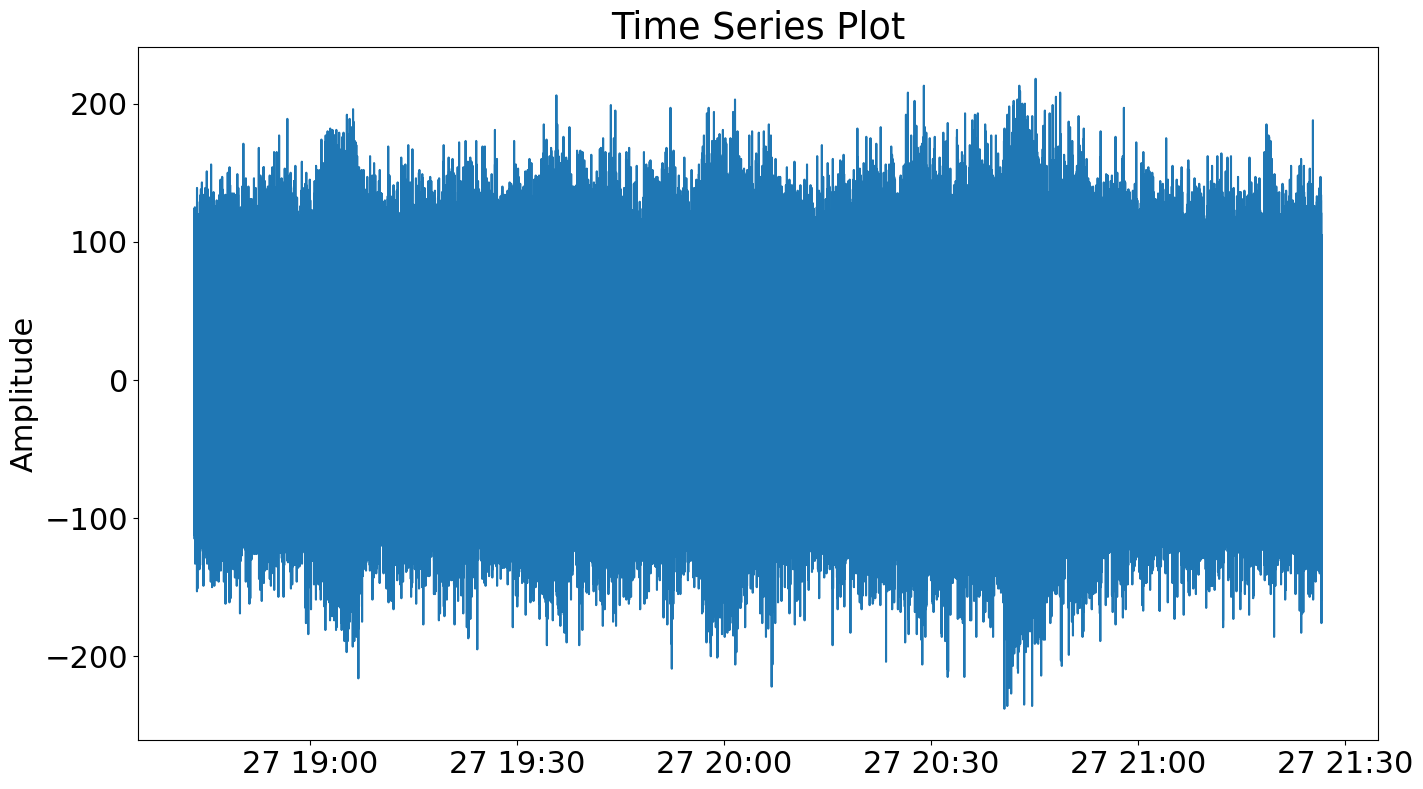

In [53]:
ooipy.plot(data_trace)

In [54]:
spec = data_trace.compute_spectrogram(L = 256,avg_time=10, overlap=0.9)


In [55]:
spec.values.shape

(981, 129)

In [56]:
# spec.time

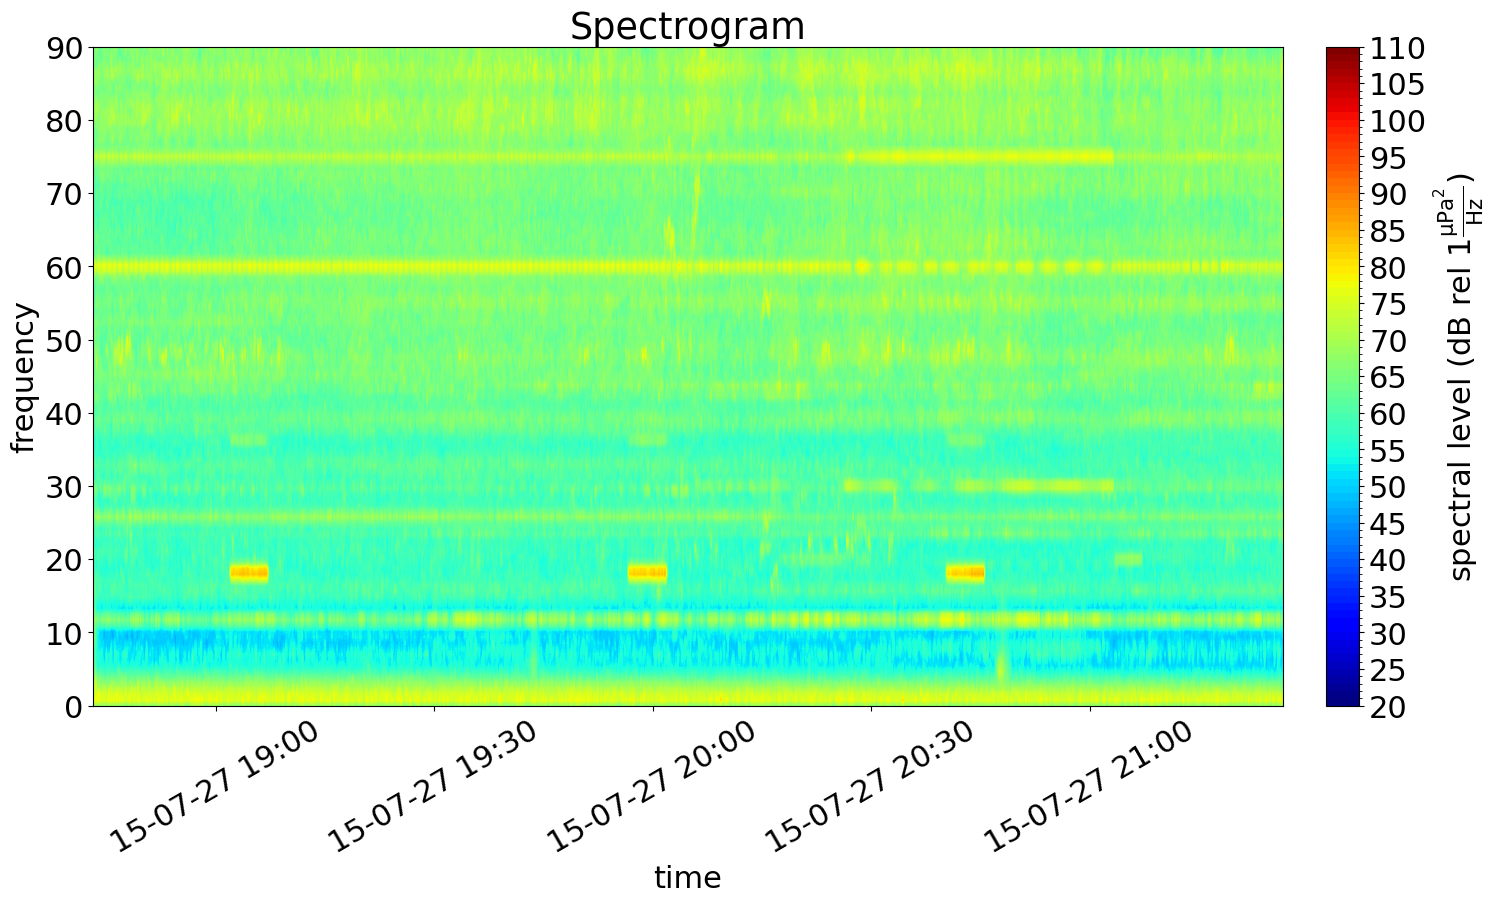

In [57]:
ooipy.plot(spec,fmin=0,fmax=90, xlabel_rot=30,vmax=110) #xlabel changed from 30 to 10
plt.show()

In [58]:
spec = data_trace.compute_spectrogram(L = 256,avg_time=2, overlap=0.9)

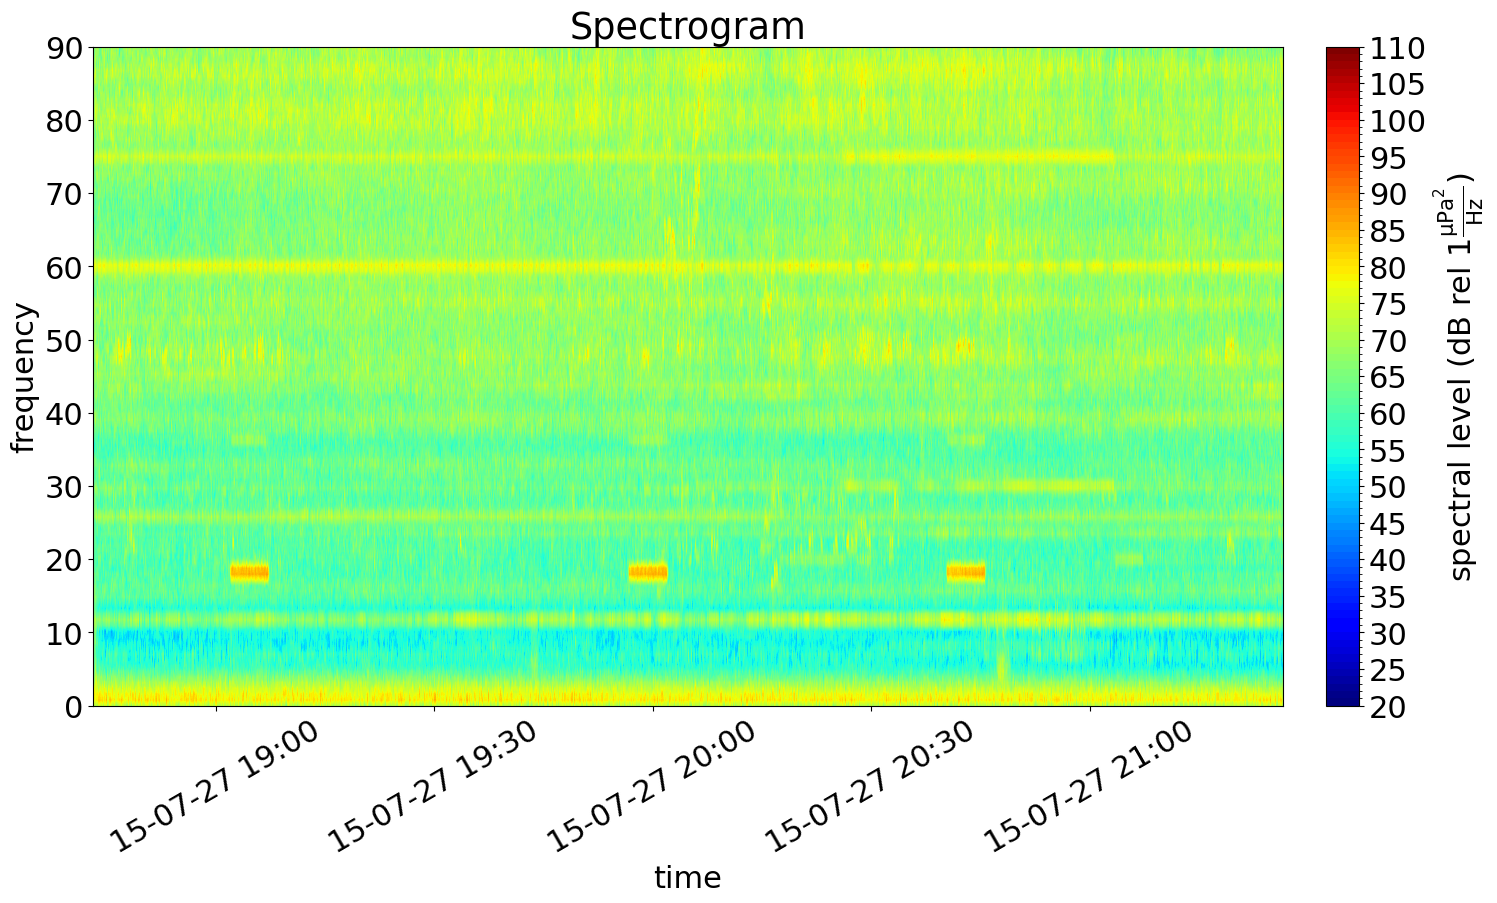

In [59]:
ooipy.plot(spec,fmin=0,fmax=90, xlabel_rot=30,vmax=110) #xlabel changed from 30 to 10
plt.show()

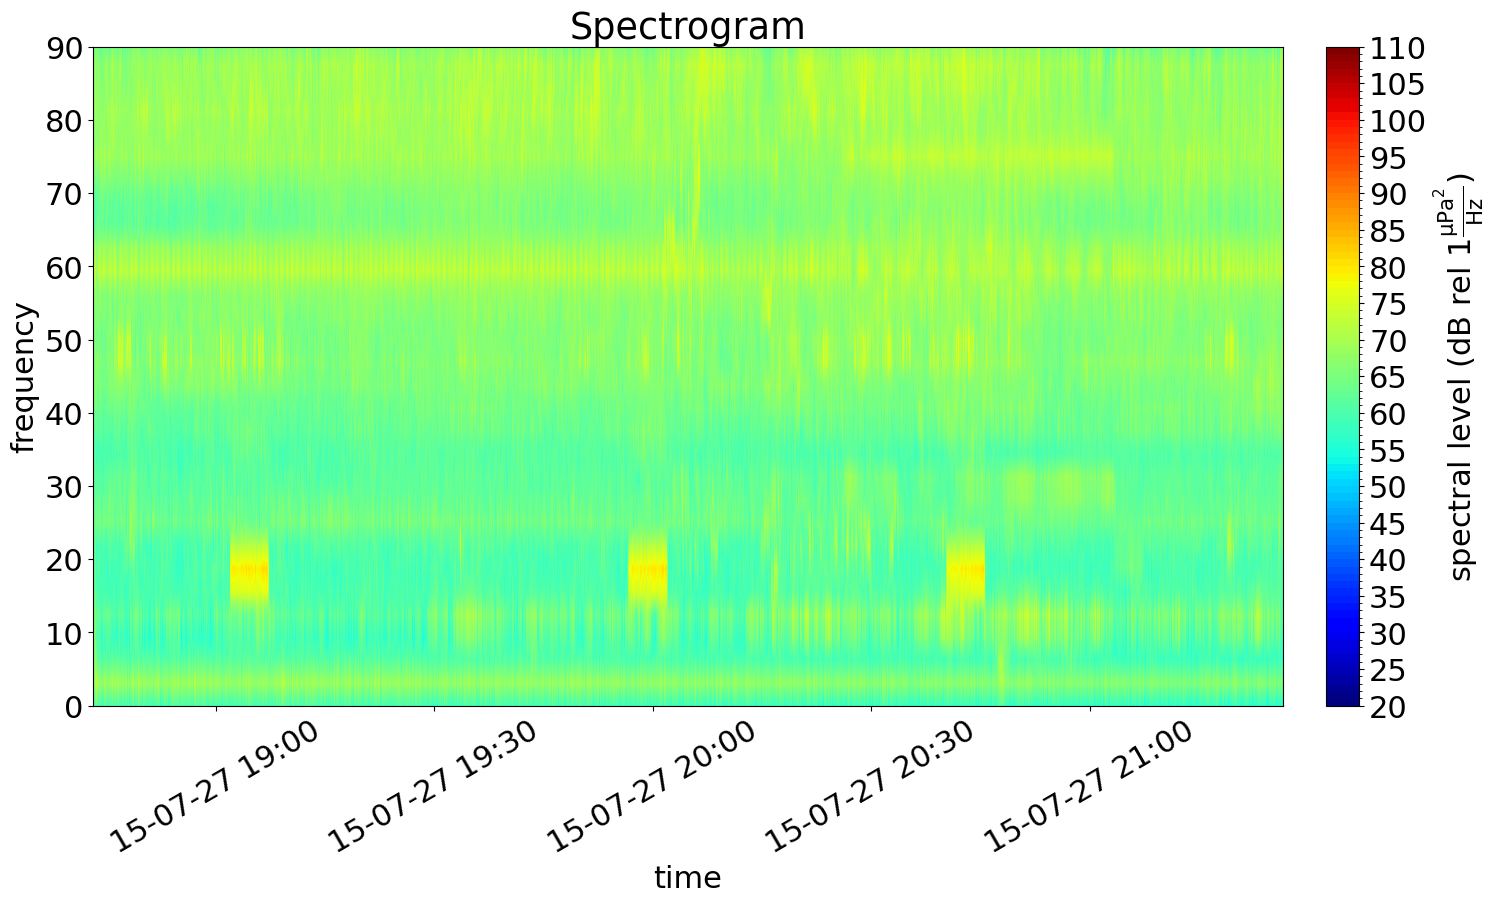

In [60]:
spec = data_trace.compute_spectrogram(L = 64,avg_time=2, overlap=0.9)
ooipy.plot(spec,fmin=0,fmax=90, xlabel_rot=30,vmax=110) #xlabel changed from 30 to 10
plt.show()

### Collect google images of ships

In [85]:
!pip install simple_image_download

  Using cached simple_image_download-0.5-py3-none-any.whl (7.0 kB)
  Using cached progressbar-2.5.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_magic_bin-0.4.14-py2.py3-none-win_amd64.whl (409 kB)
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=4aac994b90d5ccc8c24ca17651f0c4fc3b23fe6e0c2cb7fe326221528d82da3d
  Stored in directory: c:\users\khirod\appdata\local\pip\cache\wheels\cd\17\e5\765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar


In [86]:
# importing google_images_download module
# from google_images_download import google_images_download
import simple_image_download.simple_image_download as simp

In [88]:


# creating object
my_downloader = simp.Downloader()

search_queries = [x.replace('/','_') for x in vessel['vessel']]
search_queries = [x.replace(' ','_') for x in search_queries]


def downloadimages(query):
    my_downloader.search_urls(query,limit=5, verbose=True)

    # Get List of Saved URLs in cache
    print(my_downloader.get_urls())

    # Prints the Whole Cache
    print(my_downloader.cached_urls)




    # Change Direcotory
    my_downloader.directory = 'ship_images/'
    # Change File extension type
    my_downloader.extensions = '.jpg'
    print(my_downloader.extensions)
    my_downloader.download(query, limit=2, verbose=True,download_cache=True)




In [89]:
my_list = [e for e in search_queries if 'tanker' in e.lower()]

In [90]:
len(search_queries)

73

In [91]:
# Driver Code
count=0
for query in search_queries:
    query=query+'_ship'

    try:
        downloadimages(query)
    except:
        pass
    count=count+1
    print('Number =' + str(count))


[========================================================================] 100%


Asphalt_Bitumen_Tanker_ship_ed.png
Asphalt_Bitumen_Tanker_ship_2e.png
Asphalt_Bitumen_Tanker_ship_3dd.png
Asphalt_Bitumen_Tanker_ship_340.jpeg
Asphalt_Bitumen_Tanker_ship_293.jpeg
['https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png', 'https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png', 'https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png', 'https://safety4sea.com/wp-content/uploads/2016/02/Asphalt-Splendor-BV-image-e1454679181870.jpg', 'https://www.schottel.de/fileadmin/_processed_/b/6/csm_SCHOTTEL_Asphalt_Carrier_01_1600d1859a.jpg']
{'Asphalt_Bitumen_Tanker_ship_ed.png': ['simple_images/Asphalt_Bitumen_Tanker_ship', <Response [200]>], 'Asphalt_Bitumen_Tanker_ship_2e.png': ['simple_images/Asphalt_Bitumen_Tanker_ship', <Response [200]>], 'Asphalt_Bitumen_Tanker_ship_3dd.png': ['simple_images/Asphalt_Bitumen_Tanker_ship', <Response [200]>], 'Asphalt_Bitumen_Tanker_ship_340.jpeg': ['simple_images/Asphalt_Bitumen_Tanker_ship', <Response [200]>], 'Asphalt_Bitumen_Tan

[========================================================================] 100%


Bulk_Carrier_ship_100.jpeg
Bulk_Carrier_ship_39a.webp
Bulk_Carrier_ship_390.jpeg
Bulk_Carrier_ship_133.jpeg
Bulk_Carrier_ship_179.jpeg
Bulk_Carrier_ship_ea.jpeg
['https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Sabrina_I_cropped.jpg/1200px-Sabrina_I_cropped.jpg', 'https://www.marineinsight.com/wp-content/uploads/2019/05/bulk-carrier-1.jpg.webp', 'https://i.ytimg.com/vi/HtcLK6RfmNc/maxresdefault.jpg', 'https://www.ics-shipping.org/wp-content/uploads/2020/10/50072298707_94f1733de6_k.jpg', 'https://s29755.pcdn.co/wp-content/uploads/2021/05/shutterstock_drybulk2_Maks_ph-1.jpg', 'https://i.ytimg.com/vi/ExH_jpCc804/maxresdefault.jpg']
{'Bulk_Carrier_ship_100.jpeg': ['ship_images/Bulk_Carrier_ship', <Response [200]>], 'Bulk_Carrier_ship_39a.webp': ['ship_images/Bulk_Carrier_ship', <Response [200]>], 'Bulk_Carrier_ship_390.jpeg': ['ship_images/Bulk_Carrier_ship', <Response [200]>], 'Bulk_Carrier_ship_133.jpeg': ['ship_images/Bulk_Carrier_ship', <Response [200]>], 'Bulk_Carrier_ship_1

[========================================================================] 100%


Buoy-Laying_Vessel_ship_275.jpeg
['https://img.nauticexpo.com/images_ne/photo-g/32743-11912851.jpg']
{'Buoy-Laying_Vessel_ship_275.jpeg': ['ship_images/Buoy-Laying_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Buoy-Laying_Vessel_ship_275.jpeg, Downloaded from https://img.nauticexpo.com/images_ne/photo-g/32743-11912851.jpg
Number =3


[========================================================================] 100%


Cable_Layer_ship_221.jpeg
['https://i.ytimg.com/vi/ulqpQ9kdjzw/hqdefault.jpg']
{'Cable_Layer_ship_221.jpeg': ['ship_images/Cable_Layer_ship', <Response [200]>]}
{'.jpg'}
File Name=Cable_Layer_ship_221.jpeg, Downloaded from https://i.ytimg.com/vi/ulqpQ9kdjzw/hqdefault.jpg
Number =4


[========================================================================] 100%


Cargo_ship_a3.jpeg
Cargo_ship_2c9.jpeg
Cargo_ship_218.jpeg
Cargo_ship_350.jpeg
['https://grist.org/wp-content/uploads/2021/03/Maersk-container-ship-e1614978284476.jpg', 'https://media.wired.com/photos/5b4682edc6b9e35c563298ef/125:94/w_2393,h_1800,c_limit/latraviata-501749698.jpg', 'https://i.ytimg.com/vi/yu0Wb2pP3hQ/maxresdefault.jpg', 'https://s.abcnews.com/images/US/evergreen-ap-rc-220315_1647347924564_hpMain_16x9_1600.jpg']
{'Cargo_ship_a3.jpeg': ['ship_images/Cargo_ship', <Response [200]>], 'Cargo_ship_2c9.jpeg': ['ship_images/Cargo_ship', <Response [200]>], 'Cargo_ship_218.jpeg': ['ship_images/Cargo_ship', <Response [200]>], 'Cargo_ship_350.jpeg': ['ship_images/Cargo_ship', <Response [200]>]}
{'.jpg'}
File Name=Cargo_ship_a3.jpeg, Downloaded from https://grist.org/wp-content/uploads/2021/03/Maersk-container-ship-e1614978284476.jpg
File Name=Cargo_ship_2c9.jpeg, Downloaded from https://media.wired.com/photos/5b4682edc6b9e35c563298ef/125:94/w_2393,h_1800,c_limit/latraviata-501749698

[========================================================================] 100%


Cargo_Containership_ship_288.jpeg
Cargo_Containership_ship_245.jpeg
Cargo_Containership_ship_3b4.jpeg
Cargo_Containership_ship_3a0.jpeg
Cargo_Containership_ship_160.jpeg
['https://i.ytimg.com/vi/yu0Wb2pP3hQ/maxresdefault.jpg', 'https://s29755.pcdn.co/wp-content/uploads/2019/08/MSC-Gulsun-containership-container-ship-boxship-boxship-supplied-credit-MSC.jpg', 'https://zeymarine.com/wp-content/uploads/2020/01/container-ships-zeymarine-blog.jpg', 'https://www.marketplace.org/wp-content/uploads/2022/05/GettyImages-1233847608-e1653424752644.jpg?fit', 'https://grist.org/wp-content/uploads/2021/03/Maersk-container-ship-e1614978284476.jpg']
{'Cargo_Containership_ship_288.jpeg': ['ship_images/Cargo_Containership_ship', <Response [200]>], 'Cargo_Containership_ship_245.jpeg': ['ship_images/Cargo_Containership_ship', <Response [200]>], 'Cargo_Containership_ship_3b4.jpeg': ['ship_images/Cargo_Containership_ship', <Response [200]>], 'Cargo_Containership_ship_3a0.jpeg': ['ship_images/Cargo_Containersh

[========================================================================] 100%


Cement_Carrier_ship_356.jpeg
Cement_Carrier_ship_1cb.jpeg
Cement_Carrier_ship_149.jpeg
Cement_Carrier_ship_105.jpeg
Cement_Carrier_ship_205.jpeg
Cement_Carrier_ship_2dd.jpeg
['https://images.marinelink.com/images/maritime/nacc-alicudi-image-courtesy-van-91587.jpg', 'https://www.cement-carrier-alliance.com/wp-content/uploads/2019/06/cement-carrier-cemluna.jpg', 'https://mms.businesswire.com/media/20211217005026/en/1309278/5/Greenland_-_JT_Cement_JV.jpg', 'https://www.macgregor.com/globalassets/picturepark/imported-assets/795762.jpg?preset', 'https://safety4sea.com/wp-content/uploads/2019/07/baltrader-e1562926021650.jpg', 'https://www.ktushipyard.com/wp-content/uploads/2022/03/CC1-1.jpg']
{'Cement_Carrier_ship_356.jpeg': ['ship_images/Cement_Carrier_ship', <Response [200]>], 'Cement_Carrier_ship_1cb.jpeg': ['ship_images/Cement_Carrier_ship', <Response [200]>], 'Cement_Carrier_ship_149.jpeg': ['ship_images/Cement_Carrier_ship', <Response [200]>], 'Cement_Carrier_ship_105.jpeg': ['ship_ima

[========================================================================] 100%


Chemical_Tanker_ship_12.jpeg
Chemical_Tanker_ship_161.jpeg
Chemical_Tanker_ship_d3.jpeg
Chemical_Tanker_ship_32b.jpeg
['https://www.wartsila.com/images/default-source/encyclopedia/chemical-tankers.jpg?sfvrsn', 'https://i.ytimg.com/vi/KPD5cCliFAY/mqdefault.jpg', 'https://www.wartsila.com/images/default-source/encyclopedia/chemical-tanker-bow-sun.jpg?sfvrsn', 'https://marineprogress.com/wp-content/uploads/2021/05/what-is-a-chemical-tanker-marineprogress.jpg']
{'Chemical_Tanker_ship_12.jpeg': ['ship_images/Chemical_Tanker_ship', <Response [200]>], 'Chemical_Tanker_ship_161.jpeg': ['ship_images/Chemical_Tanker_ship', <Response [200]>], 'Chemical_Tanker_ship_d3.jpeg': ['ship_images/Chemical_Tanker_ship', <Response [200]>], 'Chemical_Tanker_ship_32b.jpeg': ['ship_images/Chemical_Tanker_ship', <Response [200]>]}
{'.jpg'}
File Name=Chemical_Tanker_ship_12.jpeg, Downloaded from https://www.wartsila.com/images/default-source/encyclopedia/chemical-tankers.jpg?sfvrsn
File Name=Chemical_Tanker_ship

[========================================================================] 100%


Container_Ship_ship_28d.jpeg
Container_Ship_ship_24c.jpeg
Container_Ship_ship_222.jpeg
Container_Ship_ship_2ba.jpeg
Container_Ship_ship_13f.jpeg
['https://i.ytimg.com/vi/yu0Wb2pP3hQ/maxresdefault.jpg', 'https://s29755.pcdn.co/wp-content/uploads/2019/08/MSC-Gulsun-containership-container-ship-boxship-boxship-supplied-credit-MSC.jpg.optimal.jpg', 'https://grist.org/wp-content/uploads/2021/03/Maersk-container-ship-e1614978284476.jpg', 'https://www.marketplace.org/wp-content/uploads/2022/05/GettyImages-1233847608-e1653424752644.jpg?fit', 'https://zeymarine.com/wp-content/uploads/2020/01/container-ships-zeymarine-blog.jpg']
{'Container_Ship_ship_28d.jpeg': ['ship_images/Container_Ship_ship', <Response [200]>], 'Container_Ship_ship_24c.jpeg': ['ship_images/Container_Ship_ship', <Response [200]>], 'Container_Ship_ship_222.jpeg': ['ship_images/Container_Ship_ship', <Response [200]>], 'Container_Ship_ship_2ba.jpeg': ['ship_images/Container_Ship_ship', <Response [200]>], 'Container_Ship_ship_13f

[========================================================================] 100%


Crew_Boat_ship_81.jpeg
Crew_Boat_ship_340.jpeg
Crew_Boat_ship_3e5.jpeg
['https://swiftships.com/wp-content/uploads/2020/04/46-Meter-Crew-and-Supply-Vessel-1280x640.jpg', 'https://swiftships.com/wp-content/uploads/2020/04/145-Foot-Crew-Boat-1280x640.jpg', 'https://swiftships.com/wp-content/uploads/2020/04/105-Foot-Crew-Boat-1280x640.jpg']
{'Crew_Boat_ship_81.jpeg': ['ship_images/Crew_Boat_ship', <Response [200]>], 'Crew_Boat_ship_340.jpeg': ['ship_images/Crew_Boat_ship', <Response [200]>], 'Crew_Boat_ship_3e5.jpeg': ['ship_images/Crew_Boat_ship', <Response [200]>]}
{'.jpg'}
File Name=Crew_Boat_ship_81.jpeg, Downloaded from https://swiftships.com/wp-content/uploads/2020/04/46-Meter-Crew-and-Supply-Vessel-1280x640.jpg
File Name=Crew_Boat_ship_340.jpeg, Downloaded from https://swiftships.com/wp-content/uploads/2020/04/145-Foot-Crew-Boat-1280x640.jpg
File Name=Crew_Boat_ship_3e5.jpeg, Downloaded from https://swiftships.com/wp-content/uploads/2020/04/105-Foot-Crew-Boat-1280x640.jpg
Number =1

[========================================================================] 100%


Crude_Oil_Tanker_ship_107.jpeg
Crude_Oil_Tanker_ship_c.jpeg
Crude_Oil_Tanker_ship_104.jpeg
Crude_Oil_Tanker_ship_85.jpeg
Crude_Oil_Tanker_ship_25d.jpeg
Crude_Oil_Tanker_ship_71.jpeg
['https://www.marineinsight.com/wp-content/uploads/2019/09/oil-tanker.jpg', 'https://upload.wikimedia.org/wikipedia/commons/7/75/Supertanker_AbQaiq.jpg', 'https://www.broen.com/media/2979/photo-of-ship-1036866.jpg', 'https://www.mol-service.com/hubfs/images/%E6%8E%B2%E8%BC%89%E4%BA%8B%E6%A5%AD%E9%96%A2%E9%80%A3%E7%94%BB%E5%83%8F%EF%BC%88%E6%AD%A3%E5%BC%8F%E6%8E%B2%E8%BC%89%E5%87%BA%E3%81%AA%E3%81%84%E3%82%82%E3%81%AE%E5%90%AB%E3%82%80%EF%BC%89/VLCC-1.jpg', 'https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1500w,f_auto,q_auto:best/msnbc/Components/Photos/060815/060815_tanker_vlrg_3a.jpg', 'https://i.ytimg.com/vi/Xqz1Kqt6k88/maxresdefault.jpg']
{'Crude_Oil_Tanker_ship_107.jpeg': ['ship_images/Crude_Oil_Tanker_ship', <Response [200]>], 'Crude_Oil_Tanker_ship_c.jpeg': ['ship_images/Crude_Oil_Tanker_ship', 

[========================================================================] 100%


Deck_Cargo_Ship_ship_3d0.jpeg
Deck_Cargo_Ship_ship_42.jpeg
Deck_Cargo_Ship_ship_62.jpeg
Deck_Cargo_Ship_ship_99.jpeg
Deck_Cargo_Ship_ship_3b0.jpeg
Deck_Cargo_Ship_ship_34b.jpeg
['https://www.bairdmaritime.com/wp-content/uploads/One-Apus.jpg', 'https://www.marineinsight.com/wp-content/uploads/2019/07/Mast.jpg', 'https://i.ytimg.com/vi/VGByvB-Gkg8/maxresdefault.jpg', 'https://www.ship-broker.eu/wp-content/uploads/2020/10/13000DP2offshoresalind.jpg', 'https://media.fleetmon.com/cache/newsroom_article_images/PEMBA/2e0358e8a6b36c013c90216c8ab01469.jpg', 'https://c8.alamy.com/comp/2G95Y27/deck-cargo-ship-topaz-don-in-the-kiel-canal-2G95Y27.jpg']
{'Deck_Cargo_Ship_ship_3d0.jpeg': ['ship_images/Deck_Cargo_Ship_ship', <Response [200]>], 'Deck_Cargo_Ship_ship_42.jpeg': ['ship_images/Deck_Cargo_Ship_ship', <Response [200]>], 'Deck_Cargo_Ship_ship_62.jpeg': ['ship_images/Deck_Cargo_Ship_ship', <Response [200]>], 'Deck_Cargo_Ship_ship_99.jpeg': ['ship_images/Deck_Cargo_Ship_ship', <Response [200]>]

[========================================================================] 100%


Dive_Vessel_ship_165.jpeg
Dive_Vessel_ship_b0.jpeg
Dive_Vessel_ship_28.jpeg
Dive_Vessel_ship_23e.jpeg
['https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/1l-image-117.jpg', 'https://images.oedigital.com/images/maritime/w600/-110631.jpg', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/3l-image-119.jpg', 'https://pros-blog.padi.com/wp-content/uploads/2019/07/DAN-Aritcle_DJI_0165.DNG_.jpg']
{'Dive_Vessel_ship_165.jpeg': ['ship_images/Dive_Vessel_ship', <Response [200]>], 'Dive_Vessel_ship_b0.jpeg': ['ship_images/Dive_Vessel_ship', <Response [200]>], 'Dive_Vessel_ship_28.jpeg': ['ship_images/Dive_Vessel_ship', <Response [200]>], 'Dive_Vessel_ship_23e.jpeg': ['ship_images/Dive_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Dive_Vessel_ship_165.jpeg, Downloaded from https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/1l-image-117.jpg
File Name=Dive_Vessel_ship_b0.jpeg, Downloaded from https://images.oedigital.com/images/maritime/w600/

[========================================================================] 100%


Diving_Support_Vessel_ship_265.jpeg
Diving_Support_Vessel_ship_369.jpeg
Diving_Support_Vessel_ship_6e.jpeg
Diving_Support_Vessel_ship_132.jpeg
['https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/1l-image-117.jpg', 'https://images.oedigital.com/images/maritime/w600/-110631.jpg', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/3l-image-119.jpg', 'https://dcndiving.com/wp-content/uploads/2015/03/DJI_0956.jpg']
{'Diving_Support_Vessel_ship_265.jpeg': ['ship_images/Diving_Support_Vessel_ship', <Response [200]>], 'Diving_Support_Vessel_ship_369.jpeg': ['ship_images/Diving_Support_Vessel_ship', <Response [200]>], 'Diving_Support_Vessel_ship_6e.jpeg': ['ship_images/Diving_Support_Vessel_ship', <Response [200]>], 'Diving_Support_Vessel_ship_132.jpeg': ['ship_images/Diving_Support_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Diving_Support_Vessel_ship_265.jpeg, Downloaded from https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/1l-image-

[========================================================================] 100%


Dredger_ship_158.jpeg
Dredger_ship_1ac.jpeg
Dredger_ship_304.jpeg
Dredger_ship_b8.jpeg
Dredger_ship_238.jpeg
['https://dam.krohne.com/t_ar43_cr_c//e_trim:0/w_700/q_auto/dpr_3.0/f_auto/d_im-other:image-not-available.png/im-contract-photography/blue-dredger-discharging.jpg', 'https://www.royalihc.com/sites/default/files/images/IHC%20Dredging/Cases/EasyDredge%20trailing%20suction%20hopper%20dredger%20Bahia%20San%20Carlos.jpg', 'https://cdn.offshorewind.biz/wp-content/uploads/sites/11/2019/07/26022443/hopper-1.jpg', 'https://c8.alamy.com/comp/2DDHN2F/vessel-engaged-in-dredging-dredger-working-at-sea-ship-excavating-material-from-a-water-environment-2DDHN2F.jpg', 'https://www.marinelog.com/wp-content/uploads/2021/03/dstrcountydredge.jpg']
{'Dredger_ship_158.jpeg': ['ship_images/Dredger_ship', <Response [200]>], 'Dredger_ship_1ac.jpeg': ['ship_images/Dredger_ship', <Response [200]>], 'Dredger_ship_304.jpeg': ['ship_images/Dredger_ship', <Response [200]>], 'Dredger_ship_b8.jpeg': ['ship_image

[========================================================================] 100%


Drill_Ship_ship_26d.jpeg
Drill_Ship_ship_8e.jpeg
Drill_Ship_ship_1eb.jpeg
Drill_Ship_ship_33d.jpeg
Drill_Ship_ship_1fd.jpeg
['https://www.rigzone.com/images/howitworks/HIW_Drillship2.jpg', 'https://www.marineinsight.com/wp-content/uploads/2015/07/maersk-venturer.jpg', 'https://www.e-education.psu.edu/png301/sites/www.e-education.psu.edu.png301/files/Lesson_08/Images/13.jpg', 'https://www.rigzone.com/images/howitworks/HIW_Drillship1.jpg', 'https://s1.cdn.autoevolution.com/images/news/worlds-first-eighth-generation-drill-ship-gearing-up-to-set-performance-records-192561_1.jpg']
{'Drill_Ship_ship_26d.jpeg': ['ship_images/Drill_Ship_ship', <Response [200]>], 'Drill_Ship_ship_8e.jpeg': ['ship_images/Drill_Ship_ship', <Response [200]>], 'Drill_Ship_ship_1eb.jpeg': ['ship_images/Drill_Ship_ship', <Response [200]>], 'Drill_Ship_ship_33d.jpeg': ['ship_images/Drill_Ship_ship', <Response [200]>], 'Drill_Ship_ship_1fd.jpeg': ['ship_images/Drill_Ship_ship', <Response [200]>]}
{'.jpg'}
File Name=Dri

[========================================================================] 100%


Factory_Trawler_ship_32f.jpeg
Factory_Trawler_ship_1aa.jpeg
Factory_Trawler_ship_2d6.jpeg
Factory_Trawler_ship_2e3.jpeg
['https://upload.wikimedia.org/wikipedia/commons/1/1d/Kiel_%28Ship_1973%29_-Deutsche_Fischfang_Union-_Cuxhaven_2008_by-RaBoe_01.jpg', 'https://www.marineinsight.com/wp-content/uploads/2012/10/Northern-Eagle.jpg', 'https://www.bairdmaritime.com/wp-content/uploads/Vladimir-Limanov-Main.jpg', 'https://www.bairdmaritime.com/wp-content/uploads/210106-8-EBDG.jpg']
{'Factory_Trawler_ship_32f.jpeg': ['ship_images/Factory_Trawler_ship', <Response [200]>], 'Factory_Trawler_ship_1aa.jpeg': ['ship_images/Factory_Trawler_ship', <Response [200]>], 'Factory_Trawler_ship_2d6.jpeg': ['ship_images/Factory_Trawler_ship', <Response [200]>], 'Factory_Trawler_ship_2e3.jpeg': ['ship_images/Factory_Trawler_ship', <Response [200]>]}
{'.jpg'}
File Name=Factory_Trawler_ship_32f.jpeg, Downloaded from https://upload.wikimedia.org/wikipedia/commons/1/1d/Kiel_%28Ship_1973%29_-Deutsche_Fischfang_Uni

[========================================================================] 100%


Fishing_ship_2a1.jpeg
Fishing_ship_177.jpeg
Fishing_ship_372.jpeg
Fishing_ship_2df.jpeg
Fishing_ship_a8.jpeg
['https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Macduff%2C_High_and_dry_-_geograph.org.uk_-_1374026.jpg/280px-Macduff%2C_High_and_dry_-_geograph.org.uk_-_1374026.jpg', 'https://images.squarespace-cdn.com/content/v1/5afb4b520dbda3793d154662/1563153142219-8UKV4W8513SJZI4KQG3S/am-finest-m.jpg', 'https://static01.nyt.com/images/2022/02/15/multimedia/15xp-rescue/15xp-rescue-videoSixteenByNine3000-v3.jpg', 'https://www.marineinsight.com/wp-content/uploads/2012/11/Seiners.jpg', 'https://images.squarespace-cdn.com/content/v1/5afb4b520dbda3793d154662/1564261610665-JL0NM3GOJ04J2GTBIAGA/AF2.6.19uri.jpg']
{'Fishing_ship_2a1.jpeg': ['ship_images/Fishing_ship', <Response [200]>], 'Fishing_ship_177.jpeg': ['ship_images/Fishing_ship', <Response [200]>], 'Fishing_ship_372.jpeg': ['ship_images/Fishing_ship', <Response [200]>], 'Fishing_ship_2df.jpeg': ['ship_images/Fishing_ship', <Res

[========================================================================] 100%


Fishing_Vessel_ship_cf.jpeg
Fishing_Vessel_ship_7d.jpeg
Fishing_Vessel_ship_37a.jpeg
Fishing_Vessel_ship_1ae.jpeg
['https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Macduff%2C_High_and_dry_-_geograph.org.uk_-_1374026.jpg/280px-Macduff%2C_High_and_dry_-_geograph.org.uk_-_1374026.jpg', 'https://www.marineinsight.com/wp-content/uploads/2012/11/Seiners.jpg', 'https://marine-offshore.bureauveritas.com/sites/g/files/zypfnx136/files/styles/teaser_img_text_desktop/public/2021-07/20210528_164147.jpg?h', 'https://www.wartsila.com/images/default-source/twentyfour7/master-images/fishing-for-efficiency.tmb-1920x690.jpg?sfvrsn']
{'Fishing_Vessel_ship_cf.jpeg': ['ship_images/Fishing_Vessel_ship', <Response [200]>], 'Fishing_Vessel_ship_7d.jpeg': ['ship_images/Fishing_Vessel_ship', <Response [200]>], 'Fishing_Vessel_ship_37a.jpeg': ['ship_images/Fishing_Vessel_ship', <Response [200]>], 'Fishing_Vessel_ship_1ae.jpeg': ['ship_images/Fishing_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Fi

[========================================================================] 100%


Floating_Storage_Production_ship_34f.jpeg
Floating_Storage_Production_ship_18e.jpeg
Floating_Storage_Production_ship_328.jpeg
Floating_Storage_Production_ship_18a.jpeg
Floating_Storage_Production_ship_349.jpeg
['https://www.modec.com/business/floater/fpso/img/index_im01.jpg', 'https://www.modec.com/business/floater/fpso/img/index_im03.jpg', 'https://www.modec.com/business/floater/fpso/img/index_im02.jpg', 'https://www.rigzone.com/training/images/5700.jpg', 'https://www.rigzone.com/training/images/5659.jpg']
{'Floating_Storage_Production_ship_34f.jpeg': ['ship_images/Floating_Storage_Production_ship', <Response [200]>], 'Floating_Storage_Production_ship_18e.jpeg': ['ship_images/Floating_Storage_Production_ship', <Response [200]>], 'Floating_Storage_Production_ship_328.jpeg': ['ship_images/Floating_Storage_Production_ship', <Response [200]>], 'Floating_Storage_Production_ship_18a.jpeg': ['ship_images/Floating_Storage_Production_ship', <Response [200]>], 'Floating_Storage_Production_ship_

[========================================================================] 100%


General_Cargo_ship_62.jpeg
General_Cargo_ship_103.jpeg
['https://media.fleetmon.com/maritimenews/FORtUNEagrnd.jpg', 'https://maritime-executive.com/media/images/article/Photos/Shipbuilding/Cropped/oshima%20design%2016x9.jpg']
{'General_Cargo_ship_62.jpeg': ['ship_images/General_Cargo_ship', <Response [200]>], 'General_Cargo_ship_103.jpeg': ['ship_images/General_Cargo_ship', <Response [200]>]}
{'.jpg'}
File Name=General_Cargo_ship_62.jpeg, Downloaded from https://media.fleetmon.com/maritimenews/FORtUNEagrnd.jpg
File Name=General_Cargo_ship_103.jpeg, Downloaded from https://maritime-executive.com/media/images/article/Photos/Shipbuilding/Cropped/oshima%20design%2016x9.jpg
Number =21


[========================================================================] 100%


Heavy_Lift_Vessel_ship_df.jpeg
Heavy_Lift_Vessel_ship_7c.jpeg
Heavy_Lift_Vessel_ship_26c.jpeg
Heavy_Lift_Vessel_ship_295.jpeg
Heavy_Lift_Vessel_ship_63.jpeg
Heavy_Lift_Vessel_ship_3cc.jpeg
['https://www.marineinsight.com/wp-content/uploads/2020/06/heavy-life-vessel-1.jpg', 'https://images.martide.com/en-seafarers/2021/11/heavy-lift-vessel.jpg', 'https://upload.wikimedia.org/wikipedia/commons/3/32/MV_Blue_Marlin_carrying_USS_Cole.jpg', 'https://www.marineinsight.com/wp-content/uploads/2020/06/semi-submersible-1.jpg', 'https://deltamarin.com/wp-content/uploads/2014/09/Dockwise_Vanguard_2013_credit_Dockwise_001.jpg', 'https://i.ytimg.com/vi/o7qzWC2gE4s/maxresdefault.jpg']
{'Heavy_Lift_Vessel_ship_df.jpeg': ['ship_images/Heavy_Lift_Vessel_ship', <Response [200]>], 'Heavy_Lift_Vessel_ship_7c.jpeg': ['ship_images/Heavy_Lift_Vessel_ship', <Response [200]>], 'Heavy_Lift_Vessel_ship_26c.jpeg': ['ship_images/Heavy_Lift_Vessel_ship', <Response [200]>], 'Heavy_Lift_Vessel_ship_295.jpeg': ['ship_im

[========================================================================] 100%


Heavy_Load_Carrier_ship_2c0.jpeg
Heavy_Load_Carrier_ship_86.jpeg
Heavy_Load_Carrier_ship_32a.jpeg
Heavy_Load_Carrier_ship_3ca.jpeg
Heavy_Load_Carrier_ship_18d.webp
Heavy_Load_Carrier_ship_19c.jpeg
['https://upload.wikimedia.org/wikipedia/commons/3/32/MV_Blue_Marlin_carrying_USS_Cole.jpg', 'https://www.marineinsight.com/wp-content/uploads/2020/06/semi-submersible-1.jpg', 'https://images.martide.com/en-seafarers/2021/11/heavy-lift-vessel.jpg', 'https://i.ytimg.com/vi/57vHGFFPrvQ/maxresdefault.jpg', 'https://www.marineinsight.com/wp-content/uploads/2020/06/heavy-life-vessel-1.jpg.webp', 'https://i.ytimg.com/vi/Gw8VSaaWr2E/maxresdefault.jpg']
{'Heavy_Load_Carrier_ship_2c0.jpeg': ['ship_images/Heavy_Load_Carrier_ship', <Response [200]>], 'Heavy_Load_Carrier_ship_86.jpeg': ['ship_images/Heavy_Load_Carrier_ship', <Response [200]>], 'Heavy_Load_Carrier_ship_32a.jpeg': ['ship_images/Heavy_Load_Carrier_ship', <Response [200]>], 'Heavy_Load_Carrier_ship_3ca.jpeg': ['ship_images/Heavy_Load_Carrier

[========================================================================] 100%


High_Speed_Craft_ship_19b.jpeg
High_Speed_Craft_ship_8b.jpeg
High_Speed_Craft_ship_c8.jpeg
['https://www.frs.world/fileadmin/_processed_/c/f/csm_frs-world-sawqra-aussenaufnahme_344867329e.jpg', 'https://cdn.vesseltracker.com/midres/710733.jpg', 'https://cdn.vesseltracker.com/midres/852321.jpg']
{'High_Speed_Craft_ship_19b.jpeg': ['ship_images/High_Speed_Craft_ship', <Response [200]>], 'High_Speed_Craft_ship_8b.jpeg': ['ship_images/High_Speed_Craft_ship', <Response [200]>], 'High_Speed_Craft_ship_c8.jpeg': ['ship_images/High_Speed_Craft_ship', <Response [200]>]}
{'.jpg'}
File Name=High_Speed_Craft_ship_19b.jpeg, Downloaded from https://www.frs.world/fileadmin/_processed_/c/f/csm_frs-world-sawqra-aussenaufnahme_344867329e.jpg
File Name=High_Speed_Craft_ship_8b.jpeg, Downloaded from https://cdn.vesseltracker.com/midres/710733.jpg
File Name=High_Speed_Craft_ship_c8.jpeg, Downloaded from https://cdn.vesseltracker.com/midres/852321.jpg
Number =24


Number =25


[========================================================================] 100%


Icebreaker_ship_31d.jpeg
Icebreaker_ship_43.jpeg
Icebreaker_ship_2b0.jpeg
Icebreaker_ship_3cc.jpeg
['https://poseidonexpeditions.com/upload/medialibrary/874/nuclear-icebreakers-1.jpg', 'https://i.ytimg.com/vi/pzJITtbPAjU/maxresdefault.jpg', 'https://i.ytimg.com/vi/RJ1W6P3NuCw/maxresdefault.jpg', 'https://gdb.rferl.org/731A71DC-4CB3-45A9-8129-EC7F319DAEFC_cx1_cy20_cw84_w1080_h608_s.jpg']
{'Icebreaker_ship_31d.jpeg': ['ship_images/Icebreaker_ship', <Response [200]>], 'Icebreaker_ship_43.jpeg': ['ship_images/Icebreaker_ship', <Response [200]>], 'Icebreaker_ship_2b0.jpeg': ['ship_images/Icebreaker_ship', <Response [200]>], 'Icebreaker_ship_3cc.jpeg': ['ship_images/Icebreaker_ship', <Response [200]>]}
{'.jpg'}
File Name=Icebreaker_ship_31d.jpeg, Downloaded from https://poseidonexpeditions.com/upload/medialibrary/874/nuclear-icebreakers-1.jpg
File Name=Icebreaker_ship_43.jpeg, Downloaded from https://i.ytimg.com/vi/pzJITtbPAjU/maxresdefault.jpg
File Name=Icebreaker_ship_2b0.jpeg, Downloaded 

[========================================================================] 100%


Inland_Supply_Vessel_ship_3e7.jpeg
Inland_Supply_Vessel_ship_19e.jpeg
Inland_Supply_Vessel_ship_ca.jpeg
Inland_Supply_Vessel_ship_22e.jpeg
Inland_Supply_Vessel_ship_220.jpeg
['https://c8.alamy.com/comp/2GAD59K/inland-supply-vessel-regain-towing-yellow-waste-containers-up-river-on-the-river-thames-london-as-part-of-a-waste-disposal-system-uk-2GAD59K.jpg', 'https://c8.alamy.com/comp/HAB8TK/river-thames-uk-28th-nov-2016-thames-clearwater-ll-inland-supply-vessel-HAB8TK.jpg', 'https://www.wartsila.com/images/default-source/encyclopedia/osvs1.jpg?sfvrsn', 'https://c8.alamy.com/comp/2GAD595/inland-supply-vessel-regain-towing-yellow-waste-containers-up-river-on-the-river-thames-london-as-part-of-a-waste-disposal-system-uk-2GAD595.jpg', 'https://www.riverlake.ch/wp-content/uploads/2020/11/tugsandoffshore-img-darkgrey-690x410-1.jpg']
{'Inland_Supply_Vessel_ship_3e7.jpeg': ['ship_images/Inland_Supply_Vessel_ship', <Response [200]>], 'Inland_Supply_Vessel_ship_19e.jpeg': ['ship_images/Inland_Suppl

[========================================================================] 100%


Inland_34c.jpeg
Inland_2ab.jpeg
Inland_155.jpeg
Inland_112.jpeg
['https://media.springernature.com/w580h326/nature-cms/uploads/collections/Inland-aquatic-systems-Hero-2243a72b94be9a2bcdf4ef550d654552.jpg', 'https://m.media-amazon.com/images/I/51r25PpNZzL.jpg', 'https://m.media-amazon.com/images/I/41Zc3+vYsqL._AC_SY780_.jpg', 'https://static.onecms.io/wp-content/uploads/sites/6/2019/08/inland-2000.jpg']
{'Inland_34c.jpeg': ['ship_images/Inland', <Response [200]>], 'Inland_2ab.jpeg': ['ship_images/Inland', <Response [200]>], 'Inland_155.jpeg': ['ship_images/Inland', <Response [200]>], 'Inland_112.jpeg': ['ship_images/Inland', <Response [200]>]}
{'.jpg'}
File Name=Inland_34c.jpeg, Downloaded from https://media.springernature.com/w580h326/nature-cms/uploads/collections/Inland-aquatic-systems-Hero-2243a72b94be9a2bcdf4ef550d654552.jpg
File Name=Inland_2ab.jpeg, Downloaded from https://m.media-amazon.com/images/I/51r25PpNZzL.jpg
File Name=Inland_155.jpeg, Downloaded from https://m.media-amazo

[========================================================================] 100%


LNG_Tanker_ship_3d7.jpeg
LNG_Tanker_ship_56.jpeg
LNG_Tanker_ship_194.jpeg
LNG_Tanker_ship_315.jpeg
LNG_Tanker_ship_ac.jpeg
LNG_Tanker_ship_2a5.jpeg
['https://upload.wikimedia.org/wikipedia/commons/2/20/Methanier_aspher_LNGRIVERS.jpg', 'https://cdn.britannica.com/42/179642-138-98B2270A/Overview-tankers-natural-gas.jpg', 'https://energyeducation.ca/wiki/images/1/1f/LNGtanker.jpg', 'https://www.wartsila.com/images/default-source/encyclopedia/lngtanker1.jpg?sfvrsn', 'https://i.ytimg.com/vi/l4tSDPpZIjQ/maxresdefault.jpg', 'https://lloydslist.maritimeintelligence.informa.com/-/media/lloyds-list/images/stock-images/tankers-gas/lng-tanker-in-spain.jpg?rev']
{'LNG_Tanker_ship_3d7.jpeg': ['ship_images/LNG_Tanker_ship', <Response [200]>], 'LNG_Tanker_ship_56.jpeg': ['ship_images/LNG_Tanker_ship', <Response [200]>], 'LNG_Tanker_ship_194.jpeg': ['ship_images/LNG_Tanker_ship', <Response [200]>], 'LNG_Tanker_ship_315.jpeg': ['ship_images/LNG_Tanker_ship', <Response [200]>], 'LNG_Tanker_ship_ac.jpeg':

[========================================================================] 100%


LPG_Tanker_ship_3be.jpeg
LPG_Tanker_ship_273.webp
LPG_Tanker_ship_5d.jpeg
LPG_Tanker_ship_1f1.jpeg
LPG_Tanker_ship_1c3.jpeg
['https://www.dnv.com/Images/KL_Gas_338_Petredec_VLGC_tcm71-200594.jpg', 'https://www.marineinsight.com/wp-content/uploads/2019/04/LNG-carrier.jpg.webp', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2021/07/HYUNDAI-SAMHO-HEAVY-INDUSTRIES-CO.LTD_.-800.jpg', 'https://safety4sea.com/wp-content/uploads/2017/04/Dorian-LPG-general-e1521731226735.jpg', 'https://www.dnv.com/Images/LPG_tanker_1288x511_tcm8-163244.jpg']
{'LPG_Tanker_ship_3be.jpeg': ['ship_images/LPG_Tanker_ship', <Response [200]>], 'LPG_Tanker_ship_273.webp': ['ship_images/LPG_Tanker_ship', <Response [200]>], 'LPG_Tanker_ship_5d.jpeg': ['ship_images/LPG_Tanker_ship', <Response [200]>], 'LPG_Tanker_ship_1f1.jpeg': ['ship_images/LPG_Tanker_ship', <Response [200]>], 'LPG_Tanker_ship_1c3.jpeg': ['ship_images/LPG_Tanker_ship', <Response [200]>]}
{'.jpg'}
File Name=LPG_Tanker_ship_3be.jpeg, Downloa

[========================================================================] 100%


Law_Enforce_ship_3b7.jpeg
Law_Enforce_ship_373.jpeg
Law_Enforce_ship_209.jpeg
Law_Enforce_ship_3aa.jpeg
Law_Enforce_ship_184.jpeg
['https://www.metalsharkboats.com/wp-content/uploads/2017/01/4.-Center-Consoles.jpg', 'https://www.metalsharkboats.com/wp-content/uploads/2020/02/27-Defiant-Military-Law-Enforcement-Modern-Safe-High-Performance-Aluminum-Pilothouse-Vessel-Outboard-.jpg', 'https://images.mylawquestions.com/coast-guard-cutter.jpg', 'https://i0.wp.com/www.defensemedianetwork.com/wp-content/uploads/2020/01/180407-G-G0211-004.jpg?fit', 'https://www.bairdmaritime.com/wp-content/uploads/191213-3-Jianglong.jpg']
{'Law_Enforce_ship_3b7.jpeg': ['ship_images/Law_Enforce_ship', <Response [200]>], 'Law_Enforce_ship_373.jpeg': ['ship_images/Law_Enforce_ship', <Response [200]>], 'Law_Enforce_ship_209.jpeg': ['ship_images/Law_Enforce_ship', <Response [200]>], 'Law_Enforce_ship_3aa.jpeg': ['ship_images/Law_Enforce_ship', <Response [200]>], 'Law_Enforce_ship_184.jpeg': ['ship_images/Law_Enforc

[========================================================================] 100%


Livestock_Carrier_ship_20a.jpeg
Livestock_Carrier_ship_10.jpeg
Livestock_Carrier_ship_33f.jpeg
['https://media.npr.org/assets/img/2020/09/03/ap_20247437832659-ee90426c8538d4b4e5c8ebee3893e4649f2d8948.jpg', 'https://splash247.com/wp-content/uploads/2015/10/capsized_livestock_carrier.jpg', 'https://splash247.com/wp-content/uploads/2018/11/jawan-livestock-ship-e1614063946111-780x470.jpg']
{'Livestock_Carrier_ship_20a.jpeg': ['ship_images/Livestock_Carrier_ship', <Response [200]>], 'Livestock_Carrier_ship_10.jpeg': ['ship_images/Livestock_Carrier_ship', <Response [200]>], 'Livestock_Carrier_ship_33f.jpeg': ['ship_images/Livestock_Carrier_ship', <Response [200]>]}
{'.jpg'}
File Name=Livestock_Carrier_ship_20a.jpeg, Downloaded from https://media.npr.org/assets/img/2020/09/03/ap_20247437832659-ee90426c8538d4b4e5c8ebee3893e4649f2d8948.jpg
File Name=Livestock_Carrier_ship_10.jpeg, Downloaded from https://splash247.com/wp-content/uploads/2015/10/capsized_livestock_carrier.jpg
File Name=Livestock

[========================================================================] 100%


Logistics_Naval_Vessel_ship_1f.jpeg
Logistics_Naval_Vessel_ship_33e.jpeg
Logistics_Naval_Vessel_ship_b6.jpeg
Logistics_Naval_Vessel_ship_36e.jpeg
Logistics_Naval_Vessel_ship_189.jpeg
['https://www.navalnews.com/wp-content/uploads/2022/04/Martac-T38-USV-logistics.jpg', 'https://www.nationaldefensemagazine.org/-/media/sites/magazine/2021/03/321853.jpg?h', 'https://www.navalnews.com/wp-content/uploads/2022/04/T12-beached.jpg', 'https://www.navalnews.com/wp-content/uploads/2022/04/T38E-w-Heavy-Load-1024x578.jpg', 'https://m.media-amazon.com/images/I/41Hz4KvEpRL._AC_SY350_QL15_.jpg']
{'Logistics_Naval_Vessel_ship_1f.jpeg': ['ship_images/Logistics_Naval_Vessel_ship', <Response [200]>], 'Logistics_Naval_Vessel_ship_33e.jpeg': ['ship_images/Logistics_Naval_Vessel_ship', <Response [200]>], 'Logistics_Naval_Vessel_ship_b6.jpeg': ['ship_images/Logistics_Naval_Vessel_ship', <Response [200]>], 'Logistics_Naval_Vessel_ship_36e.jpeg': ['ship_images/Logistics_Naval_Vessel_ship', <Response [200]>], 'Lo

[========================================================================] 100%


Lpg_Tanker_ship_f8.jpeg
Lpg_Tanker_ship_1d2.webp
Lpg_Tanker_ship_69.jpeg
Lpg_Tanker_ship_10.jpeg
Lpg_Tanker_ship_25.jpeg
['https://www.dnv.com/Images/KL_Gas_338_Petredec_VLGC_tcm71-200594.jpg', 'https://www.marineinsight.com/wp-content/uploads/2019/04/LNG-carrier.jpg.webp', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2021/07/HYUNDAI-SAMHO-HEAVY-INDUSTRIES-CO.LTD_.-800.jpg', 'https://safety4sea.com/wp-content/uploads/2017/04/Dorian-LPG-general-e1521731226735.jpg', 'https://www.dnv.com/Images/LPG_tanker_1288x511_tcm8-163244.jpg']
{'Lpg_Tanker_ship_f8.jpeg': ['ship_images/Lpg_Tanker_ship', <Response [200]>], 'Lpg_Tanker_ship_1d2.webp': ['ship_images/Lpg_Tanker_ship', <Response [200]>], 'Lpg_Tanker_ship_69.jpeg': ['ship_images/Lpg_Tanker_ship', <Response [200]>], 'Lpg_Tanker_ship_10.jpeg': ['ship_images/Lpg_Tanker_ship', <Response [200]>], 'Lpg_Tanker_ship_25.jpeg': ['ship_images/Lpg_Tanker_ship', <Response [200]>]}
{'.jpg'}
File Name=Lpg_Tanker_ship_f8.jpeg, Downloaded fro

[========================================================================] 100%


Military_Ops_ship_219.jpeg
Military_Ops_ship_37.jpeg
Military_Ops_ship_3ca.jpeg
Military_Ops_ship_388.jpeg
Military_Ops_ship_391.jpeg
['https://images05.military.com/sites/default/files/styles/full/public/2022-07/mil-M1A2-Abrams-tank-1800.jpg', 'https://www.falmouthpacket.co.uk/resources/images/14854247.jpg?type', 'https://i.ebayimg.com/thumbs/images/g/kVYAAOSw1Ylfvq9v/s-l1600.jpg', 'https://images01.military.com/sites/default/files/2021-02/dvids-exercise-Dynamic-Mongoose-1800.jpg', 'https://www.metalsharkboats.com/wp-content/uploads/2020/08/Metal-Shark-85-Defiant-US-Navy-Near-Coastal-Patrol-Vessel-NCPV-Damen-Stan-Patrol-2606-Military-Boat-Dominican-Republic-SOUTHCOM-USA-shipbuilder.jpg']
{'Military_Ops_ship_219.jpeg': ['ship_images/Military_Ops_ship', <Response [200]>], 'Military_Ops_ship_37.jpeg': ['ship_images/Military_Ops_ship', <Response [200]>], 'Military_Ops_ship_3ca.jpeg': ['ship_images/Military_Ops_ship', <Response [200]>], 'Military_Ops_ship_388.jpeg': ['ship_images/Military_

[========================================================================] 100%


Naval_Naval_Auxiliary_Vessel_ship_75.jpeg
Naval_Naval_Auxiliary_Vessel_ship_127.jpeg
Naval_Naval_Auxiliary_Vessel_ship_2cf.jpeg
Naval_Naval_Auxiliary_Vessel_ship_191.jpeg
Naval_Naval_Auxiliary_Vessel_ship_2a8.jpeg
['https://www.marinelog.com/wp-content/uploads/2017/09/c6be73c36c7e84dc9d5fc06a3c3dec3a.jpg', 'https://www.naval-technology.com/wp-content/uploads/sites/15/2017/09/1l-Image-28.jpg', 'https://www.navylookout.com/wp-content/uploads/2022/05/The-Royal-Fleet-Auxiliary-in-2022.jpg', 'https://koreatimes-bucket.s3.ap-northeast-2.amazonaws.com/IMAGE/upload/newsV2/images/201809/b33e73daa0484304bf676e1fc0c1aac3.jpg', 'https://navyclippings.nl/wp-content/uploads/2021/04/Schermafbeelding-2021-04-29-105026.jpg']
{'Naval_Naval_Auxiliary_Vessel_ship_75.jpeg': ['ship_images/Naval_Naval_Auxiliary_Vessel_ship', <Response [200]>], 'Naval_Naval_Auxiliary_Vessel_ship_127.jpeg': ['ship_images/Naval_Naval_Auxiliary_Vessel_ship', <Response [200]>], 'Naval_Naval_Auxiliary_Vessel_ship_2cf.jpeg': ['ship

[========================================================================] 100%


Offshore_Supply_Ship_ship_210.jpeg
Offshore_Supply_Ship_ship_222.jpeg
Offshore_Supply_Ship_ship_1c1.jpeg
Offshore_Supply_Ship_ship_2ce.jpeg
['https://www.wartsila.com/images/default-source/encyclopedia/osvs1.jpg?sfvrsn', 'https://dam.krohne.com/t_ar43_cr_c//e_trim:0/w_700/q_auto/dpr_3.0/f_auto/d_im-other:image-not-available.png/im-contract-photography/red-white-supply-ship.jpg', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/4-image-10.jpg', 'https://www.kongsberg.com/contentassets/3232d6a5712c4fe8b176bbb50cd115a1/offshore-vessel-designs.jpg?w']
{'Offshore_Supply_Ship_ship_210.jpeg': ['ship_images/Offshore_Supply_Ship_ship', <Response [200]>], 'Offshore_Supply_Ship_ship_222.jpeg': ['ship_images/Offshore_Supply_Ship_ship', <Response [200]>], 'Offshore_Supply_Ship_ship_1c1.jpeg': ['ship_images/Offshore_Supply_Ship_ship', <Response [200]>], 'Offshore_Supply_Ship_ship_2ce.jpeg': ['ship_images/Offshore_Supply_Ship_ship', <Response [200]>]}
{'.jpg'}
File Name=Offshore_Su

[========================================================================] 100%


Oil_Products_Tanker_ship_14a.jpeg
Oil_Products_Tanker_ship_bf.jpeg
Oil_Products_Tanker_ship_28c.jpeg
Oil_Products_Tanker_ship_236.jpeg
Oil_Products_Tanker_ship_248.jpeg
Oil_Products_Tanker_ship_230.jpeg
['https://www.ics-shipping.org/wp-content/uploads/2020/10/tanker.jpg', 'https://www.ship-technology.com/wp-content/uploads/static-progressive/nri/ship/projects/Ohio%20product%20tanker/ohio-tanker.jpg', 'https://i.ytimg.com/vi/0kCsMUuVgRo/maxresdefault.jpg', 'https://www.marineinsight.com/wp-content/uploads/2019/09/oil-tanker.jpg', 'https://www.kongsberg.com/globalassets/maritime/tanker-1242111_960_720.jpg?quality', 'https://www.mol.co.jp/en/iroiro_fune_e/images/02_tanker/tanker_03.jpg']
{'Oil_Products_Tanker_ship_14a.jpeg': ['ship_images/Oil_Products_Tanker_ship', <Response [200]>], 'Oil_Products_Tanker_ship_bf.jpeg': ['ship_images/Oil_Products_Tanker_ship', <Response [200]>], 'Oil_Products_Tanker_ship_28c.jpeg': ['ship_images/Oil_Products_Tanker_ship', <Response [200]>], 'Oil_Products_

[========================================================================] 100%


Oil_Chemical_Tanker_ship_b8.jpeg
Oil_Chemical_Tanker_ship_32c.jpeg
Oil_Chemical_Tanker_ship_c2.jpeg
Oil_Chemical_Tanker_ship_ac.jpeg
Oil_Chemical_Tanker_ship_5a.jpeg
['https://marine-offshore.bureauveritas.com/sites/g/files/zypfnx136/files/styles/teaser_img_text_desktop/public/2020-02/Condition-Assessment-Program-Vertical.jpg?h', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2018/03/1l-image.jpg', 'https://d3grzk40ejrt1i.cloudfront.net/media/l/1200x630/1526808657/banner-bowpioneer-helgeskodvin-29.jpg', 'https://marine-offshore.bureauveritas.com/sites/g/files/zypfnx136/files/2020-02/FPMC-Orient.jpg', 'https://www.ics-shipping.org/wp-content/uploads/2020/10/tanker.jpg']
{'Oil_Chemical_Tanker_ship_b8.jpeg': ['ship_images/Oil_Chemical_Tanker_ship', <Response [200]>], 'Oil_Chemical_Tanker_ship_32c.jpeg': ['ship_images/Oil_Chemical_Tanker_ship', <Response [200]>], 'Oil_Chemical_Tanker_ship_c2.jpeg': ['ship_images/Oil_Chemical_Tanker_ship', <Response [200]>], 'Oil_Chemical_Tanke

[========================================================================] 100%


Other_ship_2a5.jpeg
Other_ship_328.jpeg
Other_ship_2f6.jpeg
Other_ship_2ff.jpeg
Other_ship_3c1.jpeg
['https://imageio.forbes.com/specials-images/imageserve/62e07a8a04e82a86072ace28/Othership-Sauna/960x0.jpg?format', 'https://torontolife.com/wp-content/uploads/2022/06/6H5A1950.jpg', 'https://torontolife.com/wp-content/uploads/2022/06/6H5A1378.jpg', 'https://torontolife.com/wp-content/uploads/2022/06/6H5A1256.jpg', 'https://torontolife.com/wp-content/uploads/2022/06/6H5A1923.jpg']
{'Other_ship_2a5.jpeg': ['ship_images/Other_ship', <Response [200]>], 'Other_ship_328.jpeg': ['ship_images/Other_ship', <Response [200]>], 'Other_ship_2f6.jpeg': ['ship_images/Other_ship', <Response [200]>], 'Other_ship_2ff.jpeg': ['ship_images/Other_ship', <Response [200]>], 'Other_ship_3c1.jpeg': ['ship_images/Other_ship', <Response [200]>]}
{'.jpg'}
File Name=Other_ship_2a5.jpeg, Downloaded from https://imageio.forbes.com/specials-images/imageserve/62e07a8a04e82a86072ace28/Othership-Sauna/960x0.jpg?format
Fi

[========================================================================] 100%


Passenger_ship_342.jpeg
Passenger_ship_2e1.jpeg
Passenger_ship_a2.jpeg
['https://wwwcdn.imo.org/localresources/en/OurWork/Safety/PublishingImages/passenger_ships.jpg', 'https://www.transportenvironment.org/wp-content/uploads/2021/06/vertical-low-angle-shot-huge-cruise-ship-berthed-iceland-clear-sky.jpg', 'https://www.carnival.com/-/media/images/ships/carnival-luminosa-open-for-sale-hero-mobile.jpg']
{'Passenger_ship_342.jpeg': ['ship_images/Passenger_ship', <Response [200]>], 'Passenger_ship_2e1.jpeg': ['ship_images/Passenger_ship', <Response [200]>], 'Passenger_ship_a2.jpeg': ['ship_images/Passenger_ship', <Response [200]>]}
{'.jpg'}
File Name=Passenger_ship_342.jpeg, Downloaded from https://wwwcdn.imo.org/localresources/en/OurWork/Safety/PublishingImages/passenger_ships.jpg
File Name=Passenger_ship_2e1.jpeg, Downloaded from https://www.transportenvironment.org/wp-content/uploads/2021/06/vertical-low-angle-shot-huge-cruise-ship-berthed-iceland-clear-sky.jpg
File Name=Passenger_ship_a2

[========================================================================] 100%


Passenger_Ship_ship_17d.jpeg
Passenger_Ship_ship_c.jpeg
Passenger_Ship_ship_21d.jpeg
['https://www.ics-shipping.org/wp-content/uploads/2020/09/peter-hansen-MeGmdPNe36w-unsplash.jpg', 'https://wwwcdn.imo.org/localresources/en/OurWork/Safety/PublishingImages/passenger_ships.jpg', 'https://www.carnival.com/-/media/images/ships/carnival-luminosa-open-for-sale-hero-mobile.jpg']
{'Passenger_Ship_ship_17d.jpeg': ['ship_images/Passenger_Ship_ship', <Response [200]>], 'Passenger_Ship_ship_c.jpeg': ['ship_images/Passenger_Ship_ship', <Response [200]>], 'Passenger_Ship_ship_21d.jpeg': ['ship_images/Passenger_Ship_ship', <Response [200]>]}
{'.jpg'}
File Name=Passenger_Ship_ship_17d.jpeg, Downloaded from https://www.ics-shipping.org/wp-content/uploads/2020/09/peter-hansen-MeGmdPNe36w-unsplash.jpg
File Name=Passenger_Ship_ship_c.jpeg, Downloaded from https://wwwcdn.imo.org/localresources/en/OurWork/Safety/PublishingImages/passenger_ships.jpg
File Name=Passenger_Ship_ship_21d.jpeg, Downloaded from ht

[========================================================================] 100%


Passengers_Ship_ship_2ca.jpeg
Passengers_Ship_ship_291.jpeg
Passengers_Ship_ship_227.jpeg
Passengers_Ship_ship_2fd.jpeg
['https://wwwcdn.imo.org/localresources/en/OurWork/Safety/PublishingImages/passenger_ships.jpg', 'https://www.kongsberg.com/globalassets/maritime/ship.jpg?quality', 'https://images.wikimotors.org/luxury-curise-ship-at-sea.jpg', 'https://www.ics-shipping.org/wp-content/uploads/2020/09/peter-hansen-MeGmdPNe36w-unsplash.jpg']
{'Passengers_Ship_ship_2ca.jpeg': ['ship_images/Passengers_Ship_ship', <Response [200]>], 'Passengers_Ship_ship_291.jpeg': ['ship_images/Passengers_Ship_ship', <Response [200]>], 'Passengers_Ship_ship_227.jpeg': ['ship_images/Passengers_Ship_ship', <Response [200]>], 'Passengers_Ship_ship_2fd.jpeg': ['ship_images/Passengers_Ship_ship', <Response [200]>]}
{'.jpg'}
File Name=Passengers_Ship_ship_2ca.jpeg, Downloaded from https://wwwcdn.imo.org/localresources/en/OurWork/Safety/PublishingImages/passenger_ships.jpg
File Name=Passengers_Ship_ship_291.jpeg

[========================================================================] 100%


Patrol_Vessel_ship_363.jpeg
Patrol_Vessel_ship_391.jpeg
Patrol_Vessel_ship_2ce.jpeg
Patrol_Vessel_ship_1d3.jpeg
['https://swiftships.com/wp-content/uploads/2021/01/45m_new_env_cam12_007-ADJUSTED-1920x1080-1-1280x640.jpg', 'https://www.navalnews.com/wp-content/uploads/2020/01/France-confirms-order-for-six-new-POM-Offshore-Patrol-Vessels.jpg', 'https://plsadaptive.s3.amazonaws.com/eco/images/channel_content/posts/KZhnJ1nBpNNKb5tlyjOR1VnLHb1dCtdj7aqzTrHc.jpg', 'https://www.naval-technology.com/wp-content/uploads/sites/15/2017/09/1l-image-100.jpg']
{'Patrol_Vessel_ship_363.jpeg': ['ship_images/Patrol_Vessel_ship', <Response [200]>], 'Patrol_Vessel_ship_391.jpeg': ['ship_images/Patrol_Vessel_ship', <Response [200]>], 'Patrol_Vessel_ship_2ce.jpeg': ['ship_images/Patrol_Vessel_ship', <Response [200]>], 'Patrol_Vessel_ship_1d3.jpeg': ['ship_images/Patrol_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Patrol_Vessel_ship_363.jpeg, Downloaded from https://swiftships.com/wp-content/uploads/20

[========================================================================] 100%


Pilot_Vessel_ship_386.jpeg
Pilot_Vessel_ship_db.jpeg
Pilot_Vessel_ship_2e9.jpeg
Pilot_Vessel_ship_231.jpeg
['https://www.metalsharkboats.com/wp-content/uploads/2020/02/Metal-Shark-64-Defiant-Pilot-Boat-Aluminum-Made-in-USA-Modern-Next-Generation-Safe-Best-in-Class-Visibility-Pilot-Association-Vessel.jpg', 'https://www.freightcourse.com/wp-content/uploads/2021/03/what-are-pilot-boats.jpg', 'https://safety4sea.com/wp-content/uploads/2021/02/shutterstock_233931493.jpg', 'https://www.bairdmaritime.com/wp-content/uploads/pilot-61-hero.jpg']
{'Pilot_Vessel_ship_386.jpeg': ['ship_images/Pilot_Vessel_ship', <Response [200]>], 'Pilot_Vessel_ship_db.jpeg': ['ship_images/Pilot_Vessel_ship', <Response [200]>], 'Pilot_Vessel_ship_2e9.jpeg': ['ship_images/Pilot_Vessel_ship', <Response [200]>], 'Pilot_Vessel_ship_231.jpeg': ['ship_images/Pilot_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Pilot_Vessel_ship_386.jpeg, Downloaded from https://www.metalsharkboats.com/wp-content/uploads/2020/02/Meta

[========================================================================] 100%


Pleasure_Craft_ship_1ed.jpeg
Pleasure_Craft_ship_373.jpeg
Pleasure_Craft_ship_301.jpeg
Pleasure_Craft_ship_249.jpeg
Pleasure_Craft_ship_6c.jpeg
['https://i.ytimg.com/vi/Sg7Y2P6U4e0/maxresdefault.jpg', 'https://zfmarinepropulsion.com/wp-content/uploads/pleasure-craft.jpg', 'https://www.zf.com/products/media/industrial/marine/images_2/pc_pleasure_craft_yacht_Ferretti_CL100_2011_05_30_5_2_2048px.jpg', 'https://www.finning.com/content/dam/finning/en_gb/Images/Industries/Marine/Marine-Industries-Pleasure-Craft-727x420.jpg', 'https://photos.fleetmon.com/vessels/zen_9828053_3159001_Medium.jpg']
{'Pleasure_Craft_ship_1ed.jpeg': ['ship_images/Pleasure_Craft_ship', <Response [200]>], 'Pleasure_Craft_ship_373.jpeg': ['ship_images/Pleasure_Craft_ship', <Response [200]>], 'Pleasure_Craft_ship_301.jpeg': ['ship_images/Pleasure_Craft_ship', <Response [200]>], 'Pleasure_Craft_ship_249.jpeg': ['ship_images/Pleasure_Craft_ship', <Response [200]>], 'Pleasure_Craft_ship_6c.jpeg': ['ship_images/Pleasure_Cr

[========================================================================] 100%


Port_Tender_ship_18.jpeg
Port_Tender_ship_2c7.gif
Port_Tender_ship_10c.jpeg
Port_Tender_ship_b0.jpeg
['https://images.r.cruisecritic.com/features/2017/08/cruise-tender-boats-hero.jpg', 'https://cdn.bolsovercruiseclub.com/2020/07/40138-1.jpg', 'https://cruisespotlight.com/wp-content/uploads/2020/10/Carnival-Inspiration-Tender-scaled.jpg', 'https://i.ytimg.com/vi/S_HA_sc1IUA/maxresdefault.jpg']
{'Port_Tender_ship_18.jpeg': ['ship_images/Port_Tender_ship', <Response [200]>], 'Port_Tender_ship_2c7.gif': ['ship_images/Port_Tender_ship', <Response [200]>], 'Port_Tender_ship_10c.jpeg': ['ship_images/Port_Tender_ship', <Response [200]>], 'Port_Tender_ship_b0.jpeg': ['ship_images/Port_Tender_ship', <Response [200]>]}
{'.jpg'}
File Name=Port_Tender_ship_18.jpeg, Downloaded from https://images.r.cruisecritic.com/features/2017/08/cruise-tender-boats-hero.jpg
File Name=Port_Tender_ship_2c7.gif, Downloaded from https://cdn.bolsovercruiseclub.com/2020/07/40138-1.jpg
File Name=Port_Tender_ship_10c.jpe

[========================================================================] 100%


Pusher_Tug_ship_5f.jpeg
Pusher_Tug_ship_15a.jpeg
Pusher_Tug_ship_216.jpeg
Pusher_Tug_ship_e0.jpeg
['https://premiershipmodels.us/wp-content/uploads/sites/6/2019/11/1446-4622-Defiance-Pusher-Tug.jpg', 'https://c8.alamy.com/comp/D8DKRH/pusher-tug-boat-dutch-pearl-on-the-north-sea-netherlands-D8DKRH.jpg', 'https://photos.fleetmon.com/vessels/ems-tug_9849734_2684373_Medium.jpg', 'https://c8.alamy.com/comp/EFYKK4/a-type-of-towboat-called-a-pusher-pusher-boat-or-pusher-tug-is-used-EFYKK4.jpg']
{'Pusher_Tug_ship_5f.jpeg': ['ship_images/Pusher_Tug_ship', <Response [200]>], 'Pusher_Tug_ship_15a.jpeg': ['ship_images/Pusher_Tug_ship', <Response [200]>], 'Pusher_Tug_ship_216.jpeg': ['ship_images/Pusher_Tug_ship', <Response [200]>], 'Pusher_Tug_ship_e0.jpeg': ['ship_images/Pusher_Tug_ship', <Response [200]>]}
{'.jpg'}
File Name=Pusher_Tug_ship_5f.jpeg, Downloaded from https://premiershipmodels.us/wp-content/uploads/sites/6/2019/11/1446-4622-Defiance-Pusher-Tug.jpg
File Name=Pusher_Tug_ship_15a.jpeg

[========================================================================] 100%


Radar_Vessel_ship_f2.jpeg
Radar_Vessel_ship_1e3.jpeg
Radar_Vessel_ship_2e.jpeg
Radar_Vessel_ship_cd.jpeg
Radar_Vessel_ship_273.jpeg
['https://www.jrc.co.jp/eng/product/lineup/jmr5400/images2/sp_keyvisual-1.jpg', 'https://thumbs.dreamstime.com/b/oslo-norway-aug-th-bridge-lifeboat-antennas-radar-large-cargo-ship-radar-cone-bridge-cargo-vessel-195267017.jpg', 'https://maritime-executive.com/media/images/article/Photos/Historical/Bridge-on-RCCL-Oasis.e1ae80.jpg', 'https://www.myseatime.com/blogadm/wp-content/uploads/2016/05/Marine-radars.jpg', 'https://i.ytimg.com/vi/605q6Q8Somg/maxresdefault.jpg']
{'Radar_Vessel_ship_f2.jpeg': ['ship_images/Radar_Vessel_ship', <Response [200]>], 'Radar_Vessel_ship_1e3.jpeg': ['ship_images/Radar_Vessel_ship', <Response [200]>], 'Radar_Vessel_ship_2e.jpeg': ['ship_images/Radar_Vessel_ship', <Response [200]>], 'Radar_Vessel_ship_cd.jpeg': ['ship_images/Radar_Vessel_ship', <Response [200]>], 'Radar_Vessel_ship_273.jpeg': ['ship_images/Radar_Vessel_ship', <Res

[========================================================================] 100%


Reefer_ship_3e2.jpeg
Reefer_ship_246.jpeg
Reefer_ship_264.jpeg
Reefer_ship_160.jpeg
['https://maritime-executive.com/media/images/article/Photos/Vessels_Large/conventional-reefer-ship-salicia-frigo.adf4cf.jpg', 'https://www.joc.com/sites/default/files/field_feature_image/cc-story2.jpg', 'https://i.ytimg.com/vi/ylJbs7zD_yo/maxresdefault.jpg', 'https://i.ytimg.com/vi/rAZjKrMpHpU/maxresdefault.jpg']
{'Reefer_ship_3e2.jpeg': ['ship_images/Reefer_ship', <Response [200]>], 'Reefer_ship_246.jpeg': ['ship_images/Reefer_ship', <Response [200]>], 'Reefer_ship_264.jpeg': ['ship_images/Reefer_ship', <Response [200]>], 'Reefer_ship_160.jpeg': ['ship_images/Reefer_ship', <Response [200]>]}
{'.jpg'}
File Name=Reefer_ship_3e2.jpeg, Downloaded from https://maritime-executive.com/media/images/article/Photos/Vessels_Large/conventional-reefer-ship-salicia-frigo.adf4cf.jpg
File Name=Reefer_ship_246.jpeg, Downloaded from https://www.joc.com/sites/default/files/field_feature_image/cc-story2.jpg
File Name=Ree

[========================================================================] 100%


Reefer_Containership_ship_b6.jpeg
Reefer_Containership_ship_2b9.jpeg
Reefer_Containership_ship_36.jpeg
Reefer_Containership_ship_303.jpeg
Reefer_Containership_ship_268.jpeg
['https://maritime-executive.com/media/images/article/Photos/Vessels_Large/conventional-reefer-ship-salicia-frigo.adf4cf.jpg', 'https://www.bairdmaritime.com/wp-content/uploads/media/k2/items/src/43bbe23868902043e2660941f5e60894.jpg', 'https://splash247.com/wp-content/uploads/2019/02/Reefer-ship-e1614211318496.jpg', 'https://safety4sea.com/wp-content/uploads/2015/11/24714_3550_1.jpg', 'https://www.joc.com/sites/default/files/field_feature_image/Seatrade%20Blue%20alongside%20Auckland.jpg']
{'Reefer_Containership_ship_b6.jpeg': ['ship_images/Reefer_Containership_ship', <Response [200]>], 'Reefer_Containership_ship_2b9.jpeg': ['ship_images/Reefer_Containership_ship', <Response [200]>], 'Reefer_Containership_ship_36.jpeg': ['ship_images/Reefer_Containership_ship', <Response [200]>], 'Reefer_Containership_ship_303.jpeg':

[========================================================================] 100%


Replenishment_Vessel_ship_b7.jpeg
Replenishment_Vessel_ship_26d.jpeg
Replenishment_Vessel_ship_3a4.jpeg
Replenishment_Vessel_ship_3ce.jpeg
Replenishment_Vessel_ship_e6.jpeg
['https://upload.wikimedia.org/wikipedia/commons/7/74/Sirius_refueling_Juneau.jpg', 'https://www.naval-technology.com/wp-content/uploads/sites/15/2018/10/1l-image-John-Lewis-Class-TAO-205.jpg', 'https://i0.wp.com/militaryleak.com/wp-content/uploads/2022/05/naval-group-launches-french-navy-fleet-replenishment-vessel-jacques-chevallier.jpg', 'https://www.navalnews.com/wp-content/uploads/2020/05/French-Navy-Replenishment-Tanker-BRF-Logistics-Supply-Vessel-FLOTLOG-2-1024x512.jpg', 'https://www.asianmilitaryreview.com/wp-content/uploads/NUSHIP-Supply-Navantia-1.jpg']
{'Replenishment_Vessel_ship_b7.jpeg': ['ship_images/Replenishment_Vessel_ship', <Response [200]>], 'Replenishment_Vessel_ship_26d.jpeg': ['ship_images/Replenishment_Vessel_ship', <Response [200]>], 'Replenishment_Vessel_ship_3a4.jpeg': ['ship_images/Replenis

[========================================================================] 100%


Research_Survey_Vessel_ship_8f.jpeg
Research_Survey_Vessel_ship_12f.jpeg
Research_Survey_Vessel_ship_74.jpeg
Research_Survey_Vessel_ship_23.jpeg
Research_Survey_Vessel_ship_31e.jpeg
Research_Survey_Vessel_ship_21e.jpeg
['https://nauticalcharts.noaa.gov/about/images/survey-vessels/thomas-jefferson.jpg', 'https://vardmarine.com/wp-content/uploads/2019/01/research2anew.jpg', 'https://media.fugro.com/media/images/default-source/expertise/our-world/survey_vessels.jpg?sfvrsn', 'https://scripps.ucsd.edu/sites/default/files/styles/800px/public/2020-08/revelle825x400.jpg?itok', 'https://scripps.ucsd.edu/sites/default/files/styles/800px/public/2020-08/sally_ride_jepsen.jpg?itok', 'https://www.whoi.edu/wp-content/uploads/2019/01/atlantis_main_en1_36169.jpg']
{'Research_Survey_Vessel_ship_8f.jpeg': ['ship_images/Research_Survey_Vessel_ship', <Response [200]>], 'Research_Survey_Vessel_ship_12f.jpeg': ['ship_images/Research_Survey_Vessel_ship', <Response [200]>], 'Research_Survey_Vessel_ship_74.jpeg

[========================================================================] 100%


Ro-Ro_Cargo_ship_1f0.jpeg
Ro-Ro_Cargo_ship_3a9.jpeg
Ro-Ro_Cargo_ship_195.jpeg
Ro-Ro_Cargo_ship_29b.webp
Ro-Ro_Cargo_ship_12e.jpeg
Ro-Ro_Cargo_ship_3e1.jpeg
['https://www.marineinsight.com/wp-content/uploads/2015/03/nyk-roro-ship.jpg', 'https://i0.wp.com/transportgeography.org/wp-content/uploads/roroship.jpg?resize', 'https://i.ytimg.com/vi/5bsF0kJj8Ks/maxresdefault.jpg', 'https://www.marineinsight.com/wp-content/uploads/2019/05/ro-ro-ship.jpg.webp', 'https://www.joc.com/sites/default/files/field_feature_image/ro-ro2.jpg', 'https://www.marineinsight.com/wp-content/uploads/2010/10/roro-stowage.jpg']
{'Ro-Ro_Cargo_ship_1f0.jpeg': ['ship_images/Ro-Ro_Cargo_ship', <Response [200]>], 'Ro-Ro_Cargo_ship_3a9.jpeg': ['ship_images/Ro-Ro_Cargo_ship', <Response [200]>], 'Ro-Ro_Cargo_ship_195.jpeg': ['ship_images/Ro-Ro_Cargo_ship', <Response [200]>], 'Ro-Ro_Cargo_ship_29b.webp': ['ship_images/Ro-Ro_Cargo_ship', <Response [200]>], 'Ro-Ro_Cargo_ship_12e.jpeg': ['ship_images/Ro-Ro_Cargo_ship', <Respons

[========================================================================] 100%


Ro-Ro_Container_Carrier_ship_2cf.jpeg
Ro-Ro_Container_Carrier_ship_38b.jpeg
Ro-Ro_Container_Carrier_ship_1d4.jpeg
Ro-Ro_Container_Carrier_ship_39d.jpeg
Ro-Ro_Container_Carrier_ship_1d.jpeg
Ro-Ro_Container_Carrier_ship_3b3.jpeg
['https://www.joc.com/sites/default/files/field_feature_image/ro-ro2.jpg', 'https://www.joc.com/sites/default/files/field_feature_image/Matson%20Kanaloa%20class.jpg', 'https://www.marineinsight.com/wp-content/uploads/2015/03/nyk-roro-ship.jpg', 'https://www.walleniuswilhelmsen.com/img/assets/News-and-insights/549985/Spoon-Agency-WW-Ocean-1010_34dd768cd07b4d96d6f1f79d46f706a8.jpg', 'https://www.marineinsight.com/wp-content/uploads/2010/10/roro-stowage.jpg', 'https://www.walleniuswilhelmsen.com/storage/images/News-and-insights/2020-12-05-CK-Productions-011_2021-03-23-103743.jpg']
{'Ro-Ro_Container_Carrier_ship_2cf.jpeg': ['ship_images/Ro-Ro_Container_Carrier_ship', <Response [200]>], 'Ro-Ro_Container_Carrier_ship_38b.jpeg': ['ship_images/Ro-Ro_Container_Carrier_shi

[========================================================================] 100%


Ro-Ro_Passenger_Ship_ship_320.jpeg
Ro-Ro_Passenger_Ship_ship_95.jpeg
Ro-Ro_Passenger_Ship_ship_376.jpeg
Ro-Ro_Passenger_Ship_ship_9a.jpeg
Ro-Ro_Passenger_Ship_ship_1bc.jpeg
['https://www.marineinsight.com/wp-content/uploads/2015/03/nyk-roro-ship.jpg', 'https://www.marineinsight.com/wp-content/uploads/2019/05/ROPAX.jpg', 'https://www.ics-shipping.org/wp-content/uploads/2020/10/20529642920_24ac01ba30_k.jpg', 'https://i.ytimg.com/vi/nzVLV_2gFCA/maxresdefault.jpg', 'https://i.ytimg.com/vi/RwywVfUv3_U/hqdefault.jpg']
{'Ro-Ro_Passenger_Ship_ship_320.jpeg': ['ship_images/Ro-Ro_Passenger_Ship_ship', <Response [200]>], 'Ro-Ro_Passenger_Ship_ship_95.jpeg': ['ship_images/Ro-Ro_Passenger_Ship_ship', <Response [200]>], 'Ro-Ro_Passenger_Ship_ship_376.jpeg': ['ship_images/Ro-Ro_Passenger_Ship_ship', <Response [200]>], 'Ro-Ro_Passenger_Ship_ship_9a.jpeg': ['ship_images/Ro-Ro_Passenger_Ship_ship', <Response [200]>], 'Ro-Ro_Passenger_Ship_ship_1bc.jpeg': ['ship_images/Ro-Ro_Passenger_Ship_ship', <Respon

[========================================================================] 100%


SAR_ship_4b.jpeg
SAR_ship_39f.jpeg
SAR_ship_3aa.jpeg
['https://img.nauticexpo.com/images_ne/photo-m2/27585-201907.jpg', 'https://www.cummins.com/sites/default/files/2020-03/2%20SAR104%20on%20seatrial.jpg', 'https://www.navalnews.com/wp-content/uploads/2020/12/Intermarine-Launches-New-SAR-Patrol-Boat-for-Italian-Coast-Guard.jpg']
{'SAR_ship_4b.jpeg': ['ship_images/SAR_ship', <Response [200]>], 'SAR_ship_39f.jpeg': ['ship_images/SAR_ship', <Response [200]>], 'SAR_ship_3aa.jpeg': ['ship_images/SAR_ship', <Response [200]>]}
{'.jpg'}
File Name=SAR_ship_4b.jpeg, Downloaded from https://img.nauticexpo.com/images_ne/photo-m2/27585-201907.jpg
File Name=SAR_ship_39f.jpeg, Downloaded from https://www.cummins.com/sites/default/files/2020-03/2%20SAR104%20on%20seatrial.jpg
File Name=SAR_ship_3aa.jpeg, Downloaded from https://www.navalnews.com/wp-content/uploads/2020/12/Intermarine-Launches-New-SAR-Patrol-Boat-for-Italian-Coast-Guard.jpg
Number =57


[========================================================================] 100%


SAR_Aircraft_ship_110.jpeg
SAR_Aircraft_ship_26d.jpeg
['https://photos.fleetmon.com/vessels/sar-aircraft_1214_65765_Medium.jpg', 'https://imageio.forbes.com/specials-images/imageserve/5eb2e35aa8ad1100066b2dee/0x0.jpg?format']
{'SAR_Aircraft_ship_110.jpeg': ['ship_images/SAR_Aircraft_ship', <Response [200]>], 'SAR_Aircraft_ship_26d.jpeg': ['ship_images/SAR_Aircraft_ship', <Response [200]>]}
{'.jpg'}
File Name=SAR_Aircraft_ship_110.jpeg, Downloaded from https://photos.fleetmon.com/vessels/sar-aircraft_1214_65765_Medium.jpg
File Name=SAR_Aircraft_ship_26d.jpeg, Downloaded from https://imageio.forbes.com/specials-images/imageserve/5eb2e35aa8ad1100066b2dee/0x0.jpg?format
Number =58


[========================================================================] 100%


Sailing_Vessel_ship_27b.jpeg
Sailing_Vessel_ship_98.jpeg
Sailing_Vessel_ship_1dc.jpeg
['https://biospherefoundation.org/wp-content/uploads/2017/07/BFAA9473-copy-1024x674.jpg', 'https://www.newdawntraders.com/wp-content/uploads/2016/11/New-topsail-rig-2.jpg', 'https://cdn.cnn.com/cnnnext/dam/assets/121008114222-tres-hombres-2.jpg']
{'Sailing_Vessel_ship_27b.jpeg': ['ship_images/Sailing_Vessel_ship', <Response [200]>], 'Sailing_Vessel_ship_98.jpeg': ['ship_images/Sailing_Vessel_ship', <Response [200]>], 'Sailing_Vessel_ship_1dc.jpeg': ['ship_images/Sailing_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Sailing_Vessel_ship_27b.jpeg, Downloaded from https://biospherefoundation.org/wp-content/uploads/2017/07/BFAA9473-copy-1024x674.jpg
File Name=Sailing_Vessel_ship_98.jpeg, Downloaded from https://www.newdawntraders.com/wp-content/uploads/2016/11/New-topsail-rig-2.jpg
File Name=Sailing_Vessel_ship_1dc.jpeg, Downloaded from https://cdn.cnn.com/cnnnext/dam/assets/121008114222-tres-hombres

[========================================================================] 100%


Self_Discharging_Bulk_Carrier_ship_1d4.jpeg
Self_Discharging_Bulk_Carrier_ship_91.jpeg
Self_Discharging_Bulk_Carrier_ship_13c.jpeg
Self_Discharging_Bulk_Carrier_ship_38c.jpeg
Self_Discharging_Bulk_Carrier_ship_279.jpeg
Self_Discharging_Bulk_Carrier_ship_158.jpeg
['https://www.macgregor.com/globalassets/picturepark/imported-assets/410382.jpg?w', 'https://bulkcarrierguide.com/self-unloader-how-it-works.jpg', 'https://mb.cision.com/Public/15003/3021462/807df1428ffa7fc2_800x800ar.jpg', 'https://bulkcarrierguide.com/self-unloader-discharging.jpg', 'https://i.ytimg.com/vi/ud6QiHw7SU0/maxresdefault.jpg', 'https://bulkcarrierguide.com/self-unloader-cargo-flow.jpg']
{'Self_Discharging_Bulk_Carrier_ship_1d4.jpeg': ['ship_images/Self_Discharging_Bulk_Carrier_ship', <Response [200]>], 'Self_Discharging_Bulk_Carrier_ship_91.jpeg': ['ship_images/Self_Discharging_Bulk_Carrier_ship', <Response [200]>], 'Self_Discharging_Bulk_Carrier_ship_13c.jpeg': ['ship_images/Self_Discharging_Bulk_Carrier_ship', <R

[========================================================================] 100%


Special_Vessel_ship_1a2.jpeg
Special_Vessel_ship_a.jpeg
['https://www.wartsila.com/images/default-source/content-hub/webinars/hy-mexico_webinar_hub_1920_690.tmb-1920x690.jpg?sfvrsn', 'https://www.seatech.com.pl/wp-content/uploads/2019/08/SE-107_MAIN-1024x614.jpg']
{'Special_Vessel_ship_1a2.jpeg': ['ship_images/Special_Vessel_ship', <Response [200]>], 'Special_Vessel_ship_a.jpeg': ['ship_images/Special_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Special_Vessel_ship_1a2.jpeg, Downloaded from https://www.wartsila.com/images/default-source/content-hub/webinars/hy-mexico_webinar_hub_1920_690.tmb-1920x690.jpg?sfvrsn
File Name=Special_Vessel_ship_a.jpeg, Downloaded from https://www.seatech.com.pl/wp-content/uploads/2019/08/SE-107_MAIN-1024x614.jpg
Number =61


[========================================================================] 100%


Tanker_ship_159.jpeg
Tanker_ship_151.jpeg
Tanker_ship_1c9.jpeg
Tanker_ship_197.jpeg
Tanker_ship_329.jpeg
Tanker_ship_3a4.jpeg
['https://upload.wikimedia.org/wikipedia/commons/7/75/Supertanker_AbQaiq.jpg', 'https://i.ytimg.com/vi/M5vlt__ClXk/maxresdefault.jpg', 'https://www.dnv.com/Images/KL_Tan_291_Deltamarin_tanker_tcm71-198114.jpg', 'https://www.ship-technology.com/wp-content/uploads/static-progressive/nri/ship/projects/Ohio%20product%20tanker/ohio-tanker.jpg', 'https://www.mol.co.jp/en/iroiro_fune_e/images/02_tanker/tanker_03.jpg', 'https://www.ics-shipping.org/wp-content/uploads/2020/10/tanker.jpg']
{'Tanker_ship_159.jpeg': ['ship_images/Tanker_ship', <Response [200]>], 'Tanker_ship_151.jpeg': ['ship_images/Tanker_ship', <Response [200]>], 'Tanker_ship_1c9.jpeg': ['ship_images/Tanker_ship', <Response [200]>], 'Tanker_ship_197.jpeg': ['ship_images/Tanker_ship', <Response [200]>], 'Tanker_ship_329.jpeg': ['ship_images/Tanker_ship', <Response [200]>], 'Tanker_ship_3a4.jpeg': ['ship_im

[========================================================================] 100%


Tanker_-_Hazard_B_ship_2b0.jpeg
Tanker_-_Hazard_B_ship_9a.jpeg
Tanker_-_Hazard_B_ship_4d.jpeg
Tanker_-_Hazard_B_ship_1ce.jpeg
Tanker_-_Hazard_B_ship_21a.jpeg
Tanker_-_Hazard_B_ship_9f.jpeg
['https://www.frontiersin.org/files/Articles/709822/ffutr-02-709822-HTML-r1/image_m/ffutr-02-709822-g003.jpg', 'https://www.frontiersin.org/files/Articles/709822/ffutr-02-709822-HTML-r1/image_m/ffutr-02-709822-g001.jpg', 'https://www.frontiersin.org/files/Articles/709822/ffutr-02-709822-HTML-r1/image_m/ffutr-02-709822-g004.jpg', 'https://www.frontiersin.org/files/Articles/709822/ffutr-02-709822-HTML-r1/image_m/ffutr-02-709822-g002.jpg', 'https://www.frontiersin.org/files/Articles/709822/ffutr-02-709822-HTML-r1/image_m/ffutr-02-709822-g007.jpg', 'https://www.frontiersin.org/files/Articles/709822/ffutr-02-709822-HTML-r1/image_m/ffutr-02-709822-g006.jpg']
{'Tanker_-_Hazard_B_ship_2b0.jpeg': ['ship_images/Tanker_-_Hazard_B_ship', <Response [200]>], 'Tanker_-_Hazard_B_ship_9a.jpeg': ['ship_images/Tanker_-

[========================================================================] 100%


Timber_Carrier_ship_2f.jpeg
Timber_Carrier_ship_6a.jpeg
Timber_Carrier_ship_4b.jpeg
Timber_Carrier_ship_87.jpeg
['https://www.marineinsight.com/wp-content/uploads/2020/07/lumber2.jpg', 'https://sites.google.com/site/afablefritz/_/rsrc/1381719680683/specialized-cargo-ship/timber-carrier-ships/294204.jpg?height', 'https://i.ytimg.com/vi/sa4OUHzinEs/maxresdefault.jpg', 'https://www.marineinsight.com/wp-content/uploads/2020/07/lumber1.jpg']
{'Timber_Carrier_ship_2f.jpeg': ['ship_images/Timber_Carrier_ship', <Response [200]>], 'Timber_Carrier_ship_6a.jpeg': ['ship_images/Timber_Carrier_ship', <Response [200]>], 'Timber_Carrier_ship_4b.jpeg': ['ship_images/Timber_Carrier_ship', <Response [200]>], 'Timber_Carrier_ship_87.jpeg': ['ship_images/Timber_Carrier_ship', <Response [200]>]}
{'.jpg'}
File Name=Timber_Carrier_ship_2f.jpeg, Downloaded from https://www.marineinsight.com/wp-content/uploads/2020/07/lumber2.jpg
File Name=Timber_Carrier_ship_6a.jpeg, Downloaded from https://sites.google.com/s

[========================================================================] 100%


Towing_Vessel_ship_1b0.jpeg
Towing_Vessel_ship_2ee.jpeg
Towing_Vessel_ship_274.jpeg
Towing_Vessel_ship_9c.jpeg
['https://www.crowley.com/wp-content/uploads/sites/7/2020/03/vessel-towing-and-escort-hero-401.1-solutions.jpg?resize', 'https://www.marineinsight.com/wp-content/uploads/2019/08/ship-towing.jpg', 'https://thenavalarch.com/wp-content/uploads/Marine-operations-at-EMEC-test-site-Credit-Mike-Brookes-Roper-courtesy-of-EMEC-_M3R7801-640x422.jpg', 'https://safety4sea.com/wp-content/uploads/2021/03/towing-vessel-350x250.jpg']
{'Towing_Vessel_ship_1b0.jpeg': ['ship_images/Towing_Vessel_ship', <Response [200]>], 'Towing_Vessel_ship_2ee.jpeg': ['ship_images/Towing_Vessel_ship', <Response [200]>], 'Towing_Vessel_ship_274.jpeg': ['ship_images/Towing_Vessel_ship', <Response [200]>], 'Towing_Vessel_ship_9c.jpeg': ['ship_images/Towing_Vessel_ship', <Response [200]>]}
{'.jpg'}
File Name=Towing_Vessel_ship_1b0.jpeg, Downloaded from https://www.crowley.com/wp-content/uploads/sites/7/2020/03/vess

[========================================================================] 100%


Trawler_ship_240.jpeg
Trawler_ship_7d.jpeg
Trawler_ship_2e1.jpeg
Trawler_ship_163.jpeg
Trawler_ship_2e9.jpeg
['https://i.ytimg.com/vi/poj1hy01tbE/maxresdefault.jpg', 'https://www.bairdmaritime.com/wp-content/uploads/media/k2/items/src/e077736f289c2ef3244a196f83f469b9.jpg', 'https://www.marineinsight.com/wp-content/uploads/2012/10/Northern-Eagle.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Macduff%2C_High_and_dry_-_geograph.org.uk_-_1374026.jpg/280px-Macduff%2C_High_and_dry_-_geograph.org.uk_-_1374026.jpg', 'https://media.npr.org/assets/img/2022/02/15/ap22046557234541-96c3f969e5600d282410dc0c13d0942596254d1e-s1100-c50.jpg']
{'Trawler_ship_240.jpeg': ['ship_images/Trawler_ship', <Response [200]>], 'Trawler_ship_7d.jpeg': ['ship_images/Trawler_ship', <Response [200]>], 'Trawler_ship_2e1.jpeg': ['ship_images/Trawler_ship', <Response [200]>], 'Trawler_ship_163.jpeg': ['ship_images/Trawler_ship', <Response [200]>], 'Trawler_ship_2e9.jpeg': ['ship_images/Trawler_ship', <Re

[========================================================================] 100%


Tug_ship_171.jpeg
Tug_ship_1c4.jpeg
Tug_ship_a5.jpeg
Tug_ship_19f.jpeg
['https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Tug_Boat_NY_1.jpg/220px-Tug_Boat_NY_1.jpg', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2018/02/1l-image-1.jpg', 'https://www.waterwaysjournal.net/wp-content/uploads/2021/09/eWolf-rendering.jpg', 'https://marine-offshore.bureauveritas.com/sites/g/files/zypfnx136/files/2020-02/Damen-ASD-2913_courtesy-of-Damen-Shipyards.jpg']
{'Tug_ship_171.jpeg': ['ship_images/Tug_ship', <Response [200]>], 'Tug_ship_1c4.jpeg': ['ship_images/Tug_ship', <Response [200]>], 'Tug_ship_a5.jpeg': ['ship_images/Tug_ship', <Response [200]>], 'Tug_ship_19f.jpeg': ['ship_images/Tug_ship', <Response [200]>]}
{'.jpg'}
File Name=Tug_ship_171.jpeg, Downloaded from https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Tug_Boat_NY_1.jpg/220px-Tug_Boat_NY_1.jpg
File Name=Tug_ship_1c4.jpeg, Downloaded from https://www.ship-technology.com/wp-content/uploads/sites/8/2018/02/1

[========================================================================] 100%


Tug_Supply_Vessel_ship_147.jpeg
Tug_Supply_Vessel_ship_319.jpeg
Tug_Supply_Vessel_ship_3c8.jpeg
Tug_Supply_Vessel_ship_ab.jpeg
Tug_Supply_Vessel_ship_1bd.jpeg
['https://vardmarine.com/wp-content/uploads/2018/12/VARD-2-270.jpg', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/3l-image-21.jpg', 'https://www.marineinsight.com/wp-content/uploads/2013/03/AHTS-Lewek-Martin.jpg', 'https://i.ytimg.com/vi/zSqKMKEpVMQ/maxresdefault.jpg', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/1l-image-21.jpg']
{'Tug_Supply_Vessel_ship_147.jpeg': ['ship_images/Tug_Supply_Vessel_ship', <Response [200]>], 'Tug_Supply_Vessel_ship_319.jpeg': ['ship_images/Tug_Supply_Vessel_ship', <Response [200]>], 'Tug_Supply_Vessel_ship_3c8.jpeg': ['ship_images/Tug_Supply_Vessel_ship', <Response [200]>], 'Tug_Supply_Vessel_ship_ab.jpeg': ['ship_images/Tug_Supply_Vessel_ship', <Response [200]>], 'Tug_Supply_Vessel_ship_1bd.jpeg': ['ship_images/Tug_Supply_Vessel_ship', <Response [200]>

[========================================================================] 100%


Unspecified_ship_67.jpeg
Unspecified_ship_19a.jpeg
Unspecified_ship_196.jpeg
Unspecified_ship_2f6.jpeg
Unspecified_ship_d1.jpeg
Unspecified_ship_371.jpeg
['https://shipsmonthly.com/wp-content/uploads/2017/04/unspecified-820x547.jpg', 'https://i0.wp.com/timesofsandiego.com/wp-content/uploads/2014/03/12178612133_c742e3812c_c.jpg?fit', 'https://i.ytimg.com/vi/2baD715QPIU/maxresdefault.jpg', 'https://image.ajunews.com/content/image/2020/11/30/20201130141700366324.jpg', 'https://c8.alamy.com/comp/MXDTX5/english-french-ship-of-the-line-montebello-circa-1850-circa-1850-unspecified-423-montebello-in-1850-MXDTX5.jpg', 'https://www.history.navy.mil/content/history/nhhc/our-collections/photography/numerical-list-of-images/nhhc-series/nh-series/NH-109000/NH-109506/_jcr_content/mediaitem/image.img.jpg/1457394092360.jpg']
{'Unspecified_ship_67.jpeg': ['ship_images/Unspecified_ship', <Response [200]>], 'Unspecified_ship_19a.jpeg': ['ship_images/Unspecified_ship', <Response [200]>], 'Unspecified_ship_

[========================================================================] 100%


Utility_Vessel_ship_1b2.jpeg
Utility_Vessel_ship_2a2.jpeg
Utility_Vessel_ship_168.jpeg
Utility_Vessel_ship_175.jpeg
Utility_Vessel_ship_324.jpeg
['https://dam.krohne.com/t_ar43_cr_c//e_trim:0/w_700/q_auto/dpr_3.0/f_auto/d_im-other:image-not-available.png/im-contract-photography/red-white-supply-ship.jpg', 'https://www.kongsberg.com/contentassets/3232d6a5712c4fe8b176bbb50cd115a1/offshore-vessel-designs.jpg?w', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2017/10/1l-image-22.jpg', 'https://swiftships.com/wp-content/uploads/2020/09/175-riley-swifts-1280x640.jpg', 'https://www.wartsila.com/images/default-source/encyclopedia/osvs1.jpg?sfvrsn']
{'Utility_Vessel_ship_1b2.jpeg': ['ship_images/Utility_Vessel_ship', <Response [200]>], 'Utility_Vessel_ship_2a2.jpeg': ['ship_images/Utility_Vessel_ship', <Response [200]>], 'Utility_Vessel_ship_168.jpeg': ['ship_images/Utility_Vessel_ship', <Response [200]>], 'Utility_Vessel_ship_175.jpeg': ['ship_images/Utility_Vessel_ship', <Respons

[========================================================================] 100%


Vehicles_Carrier_ship_19c.jpeg
Vehicles_Carrier_ship_22d.jpeg
Vehicles_Carrier_ship_23d.jpeg
Vehicles_Carrier_ship_164.jpeg
Vehicles_Carrier_ship_7a.jpeg
Vehicles_Carrier_ship_11a.jpeg
['https://www.marvest.de/wp-content/uploads/2019/09/shutterstock_1228329946-768x512.jpg', 'https://static01.nyt.com/images/2012/07/15/automobiles/15SHIP1/15SHIP1-superJumbo.jpg', 'https://i.ytimg.com/vi/us3tQc-t-xY/maxresdefault.jpg', 'https://images.martide.com/en-seafarers/2021/12/vehicle-carrier-and-mountain.jpg', 'https://www.wartsila.com/images/default-source/encyclopedia/car-carriers1.jpg?sfvrsn', 'https://cleantechnica.com/files/2020/06/SIEM-Confucius.jpg']
{'Vehicles_Carrier_ship_19c.jpeg': ['ship_images/Vehicles_Carrier_ship', <Response [200]>], 'Vehicles_Carrier_ship_22d.jpeg': ['ship_images/Vehicles_Carrier_ship', <Response [200]>], 'Vehicles_Carrier_ship_23d.jpeg': ['ship_images/Vehicles_Carrier_ship', <Response [200]>], 'Vehicles_Carrier_ship_164.jpeg': ['ship_images/Vehicles_Carrier_ship', 

[========================================================================] 100%


Wood_Chips_Carrier_ship_31a.jpeg
Wood_Chips_Carrier_ship_43.jpeg
Wood_Chips_Carrier_ship_22b.jpeg
Wood_Chips_Carrier_ship_41.jpeg
Wood_Chips_Carrier_ship_12.jpeg
['https://www.bairdmaritime.com/wp-content/uploads/200724-6-CSSC.jpg', 'https://www.ship-technology.com/wp-content/uploads/sites/8/2022/08/wood-carrier.jpg', 'https://www.mol.co.jp/en/pr/2019/img/191105.jpg', 'https://static.vesselfinder.net/images/media/20191105/29478-57e5bf5ecd26e2f10a2cfdf93efa2d3d.jpg', 'https://www.nsyc.co.jp/wp-content/uploads/2020/12/chip-1.jpg']
{'Wood_Chips_Carrier_ship_31a.jpeg': ['ship_images/Wood_Chips_Carrier_ship', <Response [200]>], 'Wood_Chips_Carrier_ship_43.jpeg': ['ship_images/Wood_Chips_Carrier_ship', <Response [200]>], 'Wood_Chips_Carrier_ship_22b.jpeg': ['ship_images/Wood_Chips_Carrier_ship', <Response [200]>], 'Wood_Chips_Carrier_ship_41.jpeg': ['ship_images/Wood_Chips_Carrier_ship', <Response [200]>], 'Wood_Chips_Carrier_ship_12.jpeg': ['ship_images/Wood_Chips_Carrier_ship', <Response [

Yacht_ship_2ca.jpeg
Yacht_ship_11c.jpeg
Yacht_ship_1ce.jpeg
Yacht_ship_2f3.jpeg
Yacht_ship_238.jpeg
Yacht_ship_305.jpeg
['https://www.tessllc.us/wp-content/uploads/2020/07/yacht-post-825x510.jpg', 'https://cdn.cnn.com/cnnnext/dam/assets/210701131326-worlds-largest-yacht--credit--winch-design-3-full-169.jpg', 'https://imageio.forbes.com/specials-images/imageserve/5f5a93561dfa2fd957c53f52/The-swan-shaped-Avanguardia-concept-megayacht-by-Lazzarini-Design-Studio/960x0.jpg?format', 'https://bitpay.com/blog/content/images/size/w2000/2022/01/AdobeStock_124277352-BlogSize.jpg', 'https://www.lynxyachts.com/wp-content/uploads/2019/11/adventure-yacht-lynx.jpg', 'https://www.wartsila.com/images/default-source/marine-pictures/yachts/super-intelligent-yachts.jpg?sfvrsn']
{'Yacht_ship_2ca.jpeg': ['ship_images/Yacht_ship', <Response [200]>], 'Yacht_ship_11c.jpeg': ['ship_images/Yacht_ship', <Response [200]>], 'Yacht_ship_1ce.jpeg': ['ship_images/Yacht_ship', <Response [200]>], 'Yacht_ship_2f3.jpeg': [

### K means clustering


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'MMSI', 'SHIPNAME', 'VESSEL TYPE',
       'STATUS', 'SPEED (KNOTSx10)', 'LAT', 'LON', 'COURSE', 'HEADING',
       'TIMESTAMP UTC', 'LENGTH', 'Year', 'axial_Lat', 'axial_Lon',
       'axial_Loc', 'ship_Loc', 'central_caldera_Lat', 'central_caldera_Lon',
       'central_caldera_Loc', 'eastern_caldera_Lat', 'eastern_caldera_Lon',
       'eastern_caldera_Loc', 'distance(in km) axial',
       'distance(in km) central cald', 'distance(in km) eastern cald',
       'bearing_axial', 'bearing_eastern_cald', 'bearing_central_cald'],
      dtype='object')

In [6]:
df.iloc[:,:10].head()

,Unnamed: 0.1,Unnamed: 0,MMSI,SHIPNAME,VESSEL TYPE,STATUS,SPEED (KNOTSx10),LAT,LON,COURSE
0,0,0,209605000,AKILI,Bulk Carrier,0,108,46.09859,-129.6550,83
1,1,1,256832000,NaN,NaN,0,115,45.07486,-128.9430,178
2,2,2,352358000,ANNA G,Bulk Carrier,0,132,45.86138,-130.5627,86
3,3,3,356566000,GLOBAL SAIKAI,General Cargo,0,104,46.50261,-129.0129,272
4,4,4,477293500,JIN XIU FENG,Bulk Carrier,0,112,46.74633,-129.5912,299


In [53]:

vessel=df.groupby(by=['VESSEL TYPE']).agg({'LENGTH':np.median,'SPEED (KNOTSx10)':[np.median,\
'mean','min','max'],'MMSI':'count'}).reset_index()
print(vessel.head())
vessel.columns=['vessel','median_length','median_speed','mean_speed','min_speed','max_speed','count']


              VESSEL TYPE  LENGTH SPEED (KNOTSx10)                       \
                           median           median        mean min  max   
0  Asphalt/Bitumen Tanker  183.06            130.0  123.768116  97  139   
1            Bulk Carrier  199.90            114.0  106.933049   0  887   
2      Buoy-Laying Vessel   68.80            132.0  130.742690   1  153   
3             Cable Layer  139.15            104.0   86.191833   0  130   
4                   Cargo  199.00            116.0  104.029068   0  196   

      MMSI  
     count  
0      207  
1  1229533  
2      171  
3     1053  
4    10596  


In [6]:
vessel=pd.read_csv('Vessels/vessel.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 3: invalid start byte

In [69]:
isolated_vessels= vessel[vessel['vessel'].isin(iso_vessel_list)].reset_index().drop('index',axis=1)

In [70]:
isolated_vessels

,vessel,median_length,median_speed,mean_speed,min_speed,max_speed,count
0,Bulk Carrier,199.90,114.0,106.933049,0,887,1229533
1,Cargo,199.00,116.0,104.029068,0,196,10596
2,Cargo/Containership,217.00,214.0,178.309098,45,251,5309
3,Chemical Tanker,174.43,124.0,113.800302,0,160,7291
4,Container Ship,262.18,193.0,181.226741,1,957,48002
5,Crude Oil Tanker,255.90,63.0,68.481145,0,913,146937
6,Fishing Vessel,27.24,67.0,62.398998,0,129,17965
7,General Cargo,179.97,120.0,114.968050,0,611,84851
8,Heavy Load Carrier,169.40,134.0,122.256906,15,158,1086
9,Icebreaker,121.62,138.0,131.701266,56,165,395


In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [72]:
vessel2=isolated_vessels.copy()

In [73]:
model = KMeans(n_clusters=5)
x=vessel2.iloc[:,[1]]
y=vessel2.vessel
model.fit(x)


KMeans(n_clusters=5)

In [74]:
y

0               Bulk Carrier
1                      Cargo
2        Cargo/Containership
3            Chemical Tanker
4             Container Ship
5           Crude Oil Tanker
6             Fishing Vessel
7              General Cargo
8         Heavy Load Carrier
9                 Icebreaker
10           Inland, Unknown
11                LPG Tanker
12      Offshore Supply Ship
13       Oil Products Tanker
14       Oil/Chemical Tanker
15                 Passenger
16            Passenger Ship
17                    Reefer
18    Research/Survey Vessel
19               Ro-Ro Cargo
20            Special Vessel
21                    Tanker
22             Towing Vessel
23                       Tug
24         Tug/Supply Vessel
25               Unspecified
26          Vehicles Carrier
27        Wood Chips Carrier
28                     Yacht
Name: vessel, dtype: object

In [75]:
pred=pd.Series(model.predict(x),name='clusters')

In [76]:
vessel2=pd.concat([vessel2,pred],axis=1)


In [77]:
vessel2.head()

,vessel,median_length,median_speed,mean_speed,min_speed,max_speed,count,clusters
0,Bulk Carrier,199.90,114.0,106.933049,0,887,1229533,1
1,Cargo,199.00,116.0,104.029068,0,196,10596,1
2,Cargo/Containership,217.00,214.0,178.309098,45,251,5309,1
3,Chemical Tanker,174.43,124.0,113.800302,0,160,7291,4
4,Container Ship,262.18,193.0,181.226741,1,957,48002,3


In [78]:
vessel2.to_csv('vessel_k5_1f.csv')

In [79]:
vessel2

,vessel,median_length,median_speed,mean_speed,min_speed,max_speed,count,clusters
0,Bulk Carrier,199.90,114.0,106.933049,0,887,1229533,1
1,Cargo,199.00,116.0,104.029068,0,196,10596,1
2,Cargo/Containership,217.00,214.0,178.309098,45,251,5309,1
3,Chemical Tanker,174.43,124.0,113.800302,0,160,7291,4
4,Container Ship,262.18,193.0,181.226741,1,957,48002,3
5,Crude Oil Tanker,255.90,63.0,68.481145,0,913,146937,3
6,Fishing Vessel,27.24,67.0,62.398998,0,129,17965,2
7,General Cargo,179.97,120.0,114.968050,0,611,84851,4
8,Heavy Load Carrier,169.40,134.0,122.256906,15,158,1086,4
9,Icebreaker,121.62,138.0,131.701266,56,165,395,0
